# Name : Dhrupad Kumar Das

# Batch - 10

# Mini Project : Beans Multiclass Classification

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline
sns.set(style = "darkgrid", font_scale = 1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

import warnings
warnings.filterwarnings("ignore")

In [67]:
from sklearn.linear_model import LogisticRegression


from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer


In [68]:
df = pd.read_excel("Beans Multiclass Classification Excel.xlsx")
df.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [69]:
df.tail(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON

In [70]:
df.sample(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5933   48343    895.913       383.717555       160.726471      2.387395   
13403  39722    744.336       286.930497       176.501425      1.625655   
3223   83127   1093.874       410.119695       259.051529      1.583159   
6400   53174    904.614       361.914574       189.074605      1.914136   
7256   63234   1025.276       416.665186       194.557390      2.141606   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5933       0.908048       48920     248.097197  0.613412  0.988205   0.756853   
13403      0.788421       40051     224.890243  0.702485  0.991785   0.900955   
3223       0.775255       83960     325.331498  0.695141  0.990079   0.873006   
6400       0.852683       53848     260.198462  0.762155  0.987483   0.816550   
7256       0.884289       64172     283.746417  0.675187  0.985383   0.755925   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
5933      0.646562      0.007937      0.000856      0.418042      0.998032   
13403     0.783780      0.007223      0.001682      0.614310      0.998657   
3223      0.793260      0.004934      0.001205      0.629261      0.996220   
6400      0.718950      0.006806      0.001122      0.516889      0.989396   
7256      0.680994      0.006589      0.000874      0.463753      0.993175   

          Class  
5933      HOROZ  
13403  DERMASON  
3223   BARBUNYA  
6400      HOROZ  
7256      HOROZ

## In the column 5th we can see that there is a mis-spelling
## So the AspectRation should be Aspect Ratio

In [71]:
df.rename(columns = {'AspectRation' : 'AspectRatio'}, inplace = True)

In [72]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [74]:
df.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRatio      13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRatio          1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733


###  **About the Data:**

This data shows information about **13,611 shapes or objects**, probably from images. Each row in the table gives the **average**, **spread**, and **range** for different shape features.

---

###  **Key Takeaways:**

* **Size (Area & Perimeter)**:

  * The sizes of the shapes vary a lot. Some are small, others are very large.
  * The perimeter (the boundary length) also changes a lot, which means the shapes can be simple or complex.

* **Length and Shape**:

  * The major and minor axis lengths (longest and shortest dimensions) are different for each shape.
  * The **aspect ratio** shows that most shapes are **not perfect circles**—they are stretched out a bit.

* **Eccentricity**:

  * Most shapes are more like **ellipses** than circles, meaning they are slightly elongated.

* **Solidity, Extent, Compactness, Roundness**:

  * Shapes are generally **solid and filled**, not hollow or full of holes.
  * They use their space well (Extent) and have a neat, regular shape (Compactness and Roundness).
  * But some are more rounded than others.

* **Shape Factors**:

  * These are extra measurements to understand how the shape compares to perfect or regular forms.
  * One of them (ShapeFactor4) is very close to 1, meaning most shapes are **very close to ideal geometric forms** like circles or ellipses.

---

# Checking for the duplicates

In [75]:
df.duplicated().sum()

68

# Since we have 13611 columns so that's why we will drop the duplicates since it is a negligible number

In [76]:
df = df.drop_duplicates()

print("Remaining Duplicates:", df.duplicated().sum())
print("New shape:", df.shape)

Remaining Duplicates: 0
New shape: (13543, 17)


# Checking for the missing values

In [77]:
df.isnull().sum().to_frame().rename(columns = {0 : "No. of missing Values"})

No. of missing Values
Area                                 0
Perimeter                            0
MajorAxisLength                      0
MinorAxisLength                      0
AspectRatio                          0
Eccentricity                         0
ConvexArea                           0
EquivDiameter                        0
Extent                               0
Solidity                             0
roundness                            0
Compactness                          0
ShapeFactor1                         0
ShapeFactor2                         0
ShapeFactor3                         0
ShapeFactor4                         0
Class                                0

# Checking for the numerical and categorical variables

In [78]:
numerical_df = df.select_dtypes(include = [np.number])
numerical_df.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147      0.834222      0.998724  
1     0.953861      0.006979      0.003564      0.909851      0.998430  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
3     0.928329      0.007017      0.003215      0.861794      0.994199  
4     0.970516      0.006697      0.003665      0.941900      0.999166

In [79]:
categorical_df = df.select_dtypes(include = ["object"])
categorical_df.head(5)

Class
0  SEKER
1  SEKER
2  SEKER
3  SEKER
4  SEKER

### So clearly there is no categorical column
### Since Class is the column that we have to predict

# Correlation Matrix

In [80]:
correlation_matrix = df.corr(numeric_only = True)

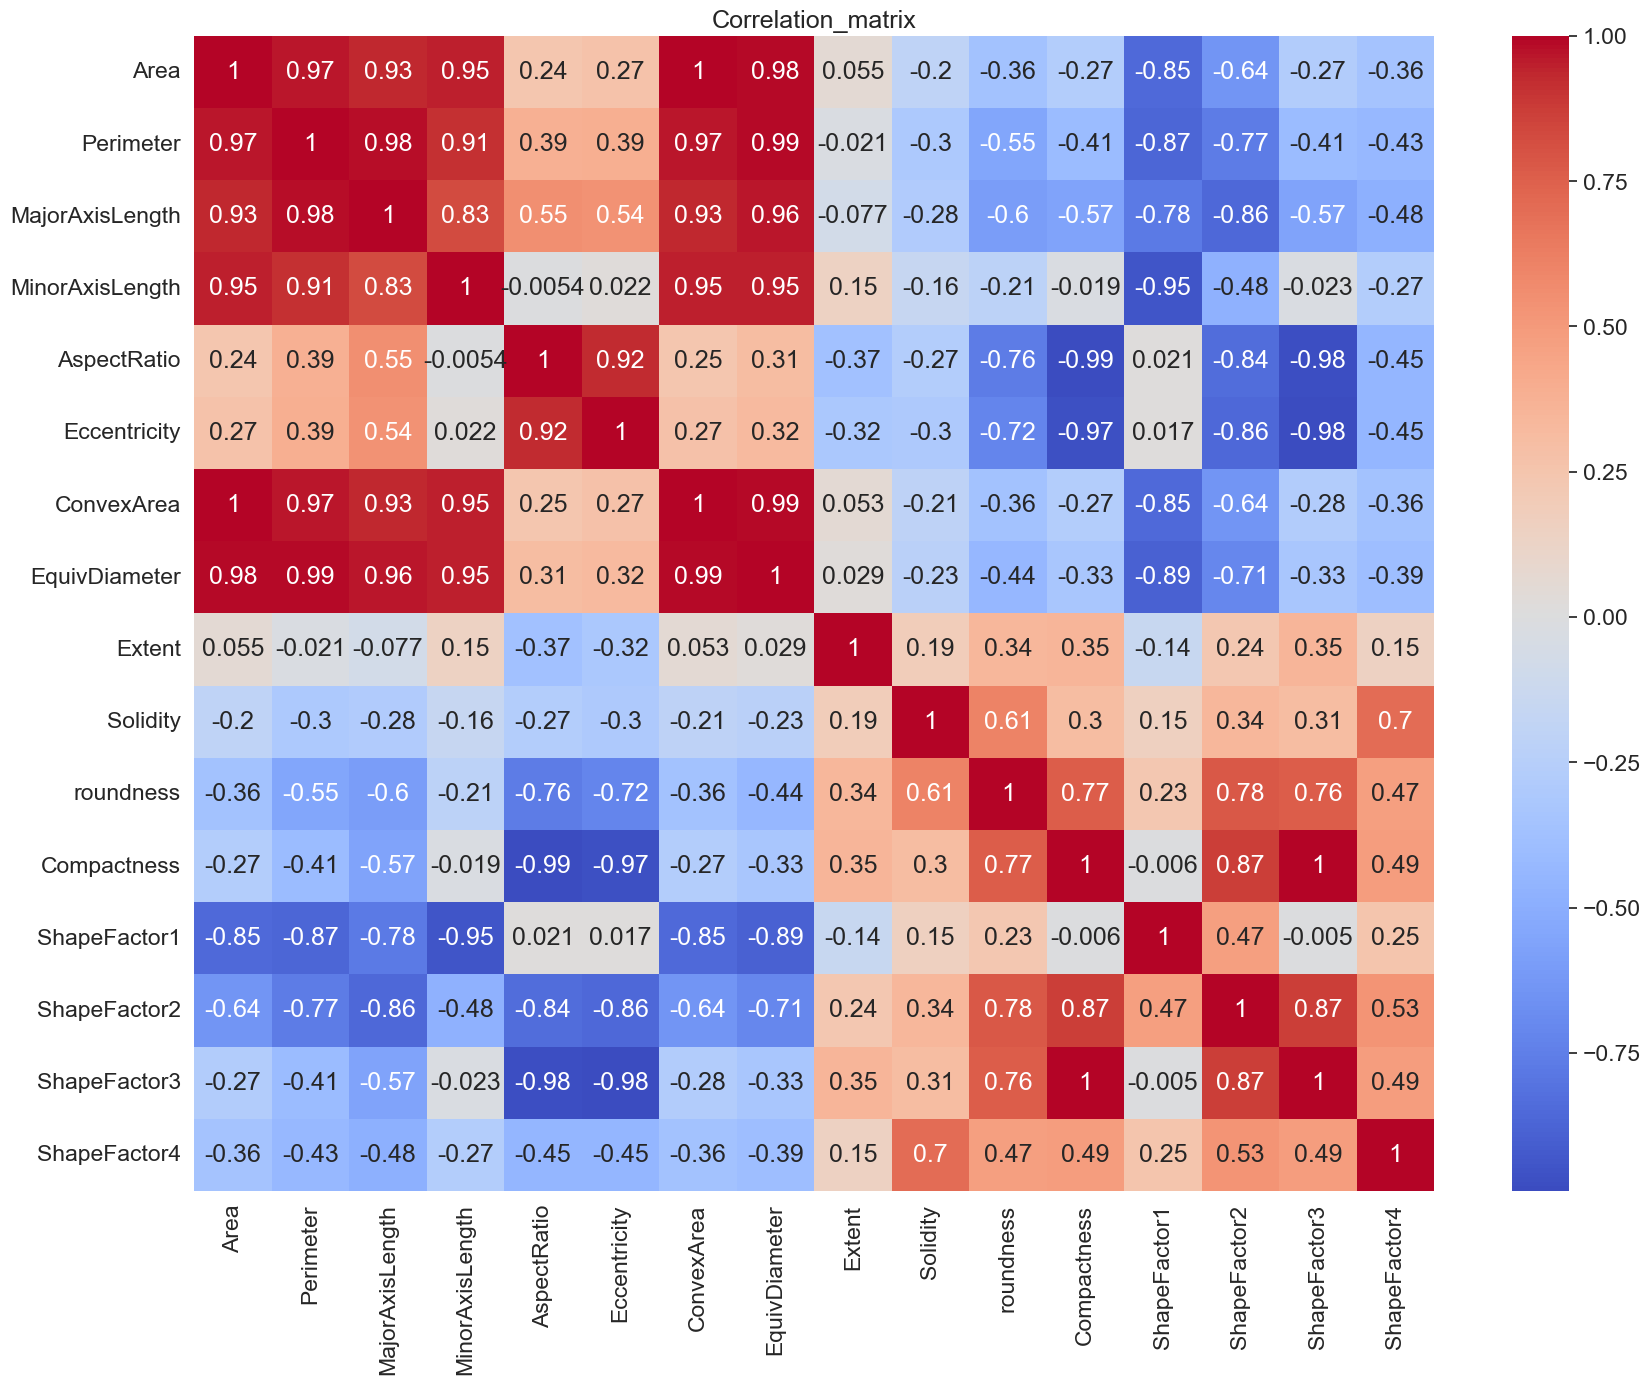

In [81]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation_matrix")
plt.show()

## Clearly we can see that there is a high corelation between 
### 1. Area and [Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter]
### 2. Perimeter and [MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter]
### 3. MajorAxisLength and [MinorAxisLength, ConvexArea, EquivDiameter]
### 4. MinorAxisLength and [ConvexArea, EquivDiameter]
### 5. ConvexArea and AspectRation
### 6. Compactness and [ShapeFactor2 ShapeFactor3]
### 7. ShapeFactor2 and ShapeFactor3
### 8. AspectRatio and Eccentricity

In [16]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

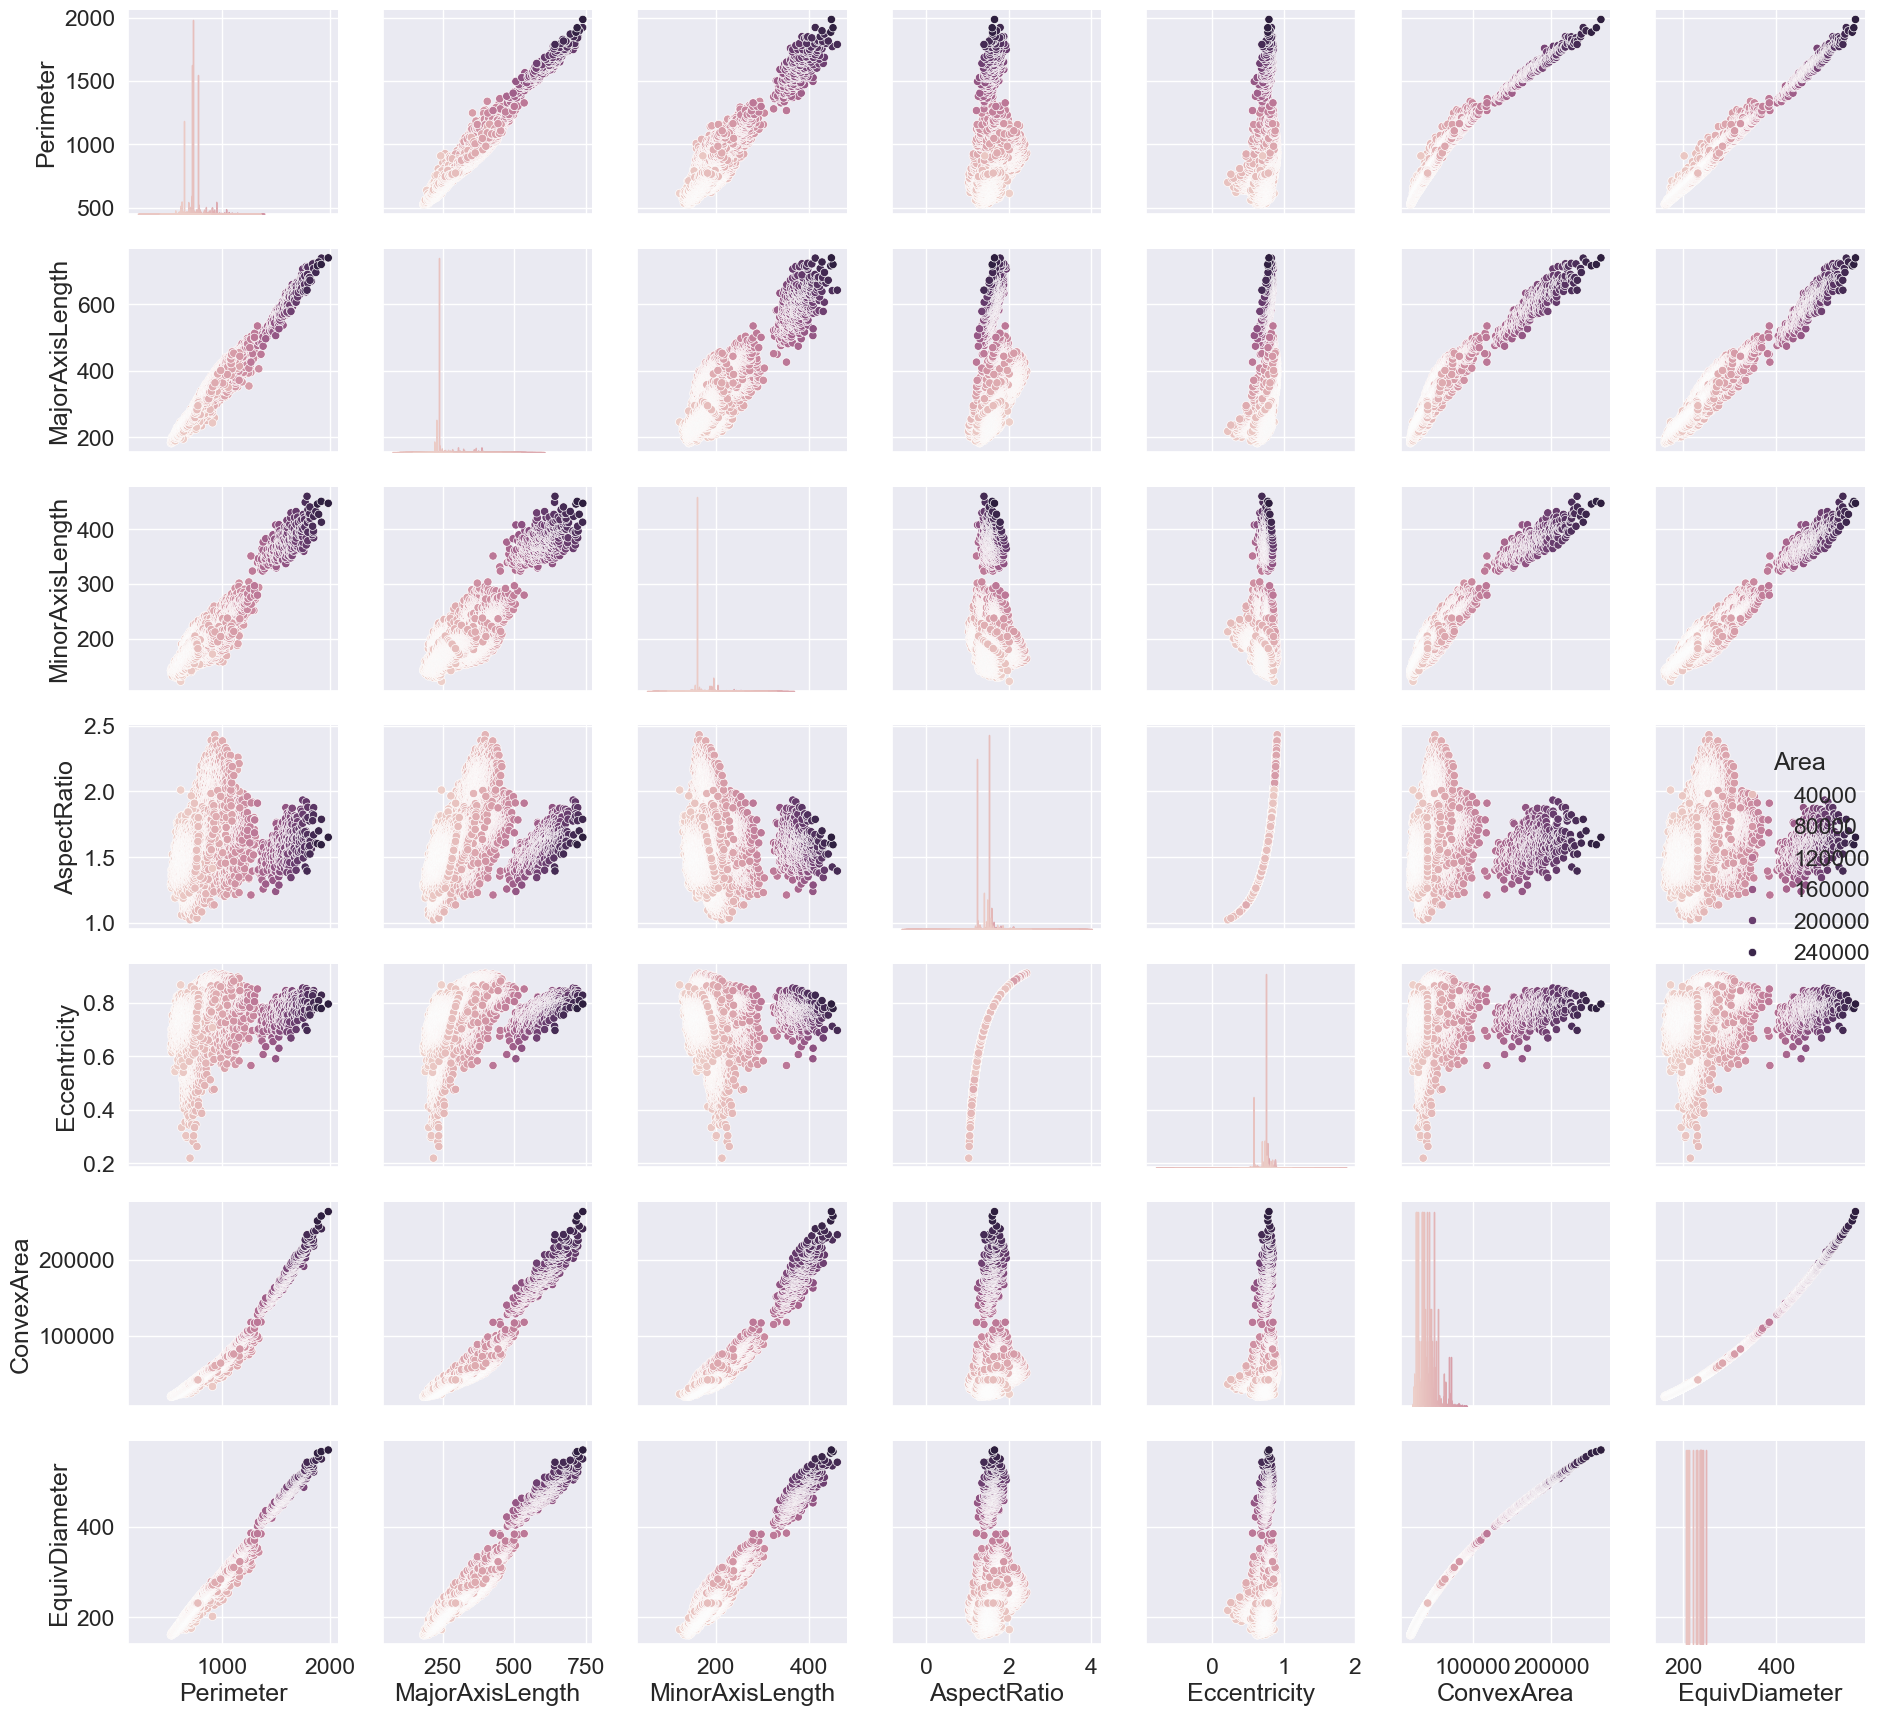

In [17]:
selected_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter']
plt.figure(figsize = (15,10))
sns.pairplot(df[selected_columns], hue = "Area")
plt.tight_layout()
plt.show()

# Checking and treating the outliers:

In [82]:
numerical_cols = df.select_dtypes(include = ["number"]).columns

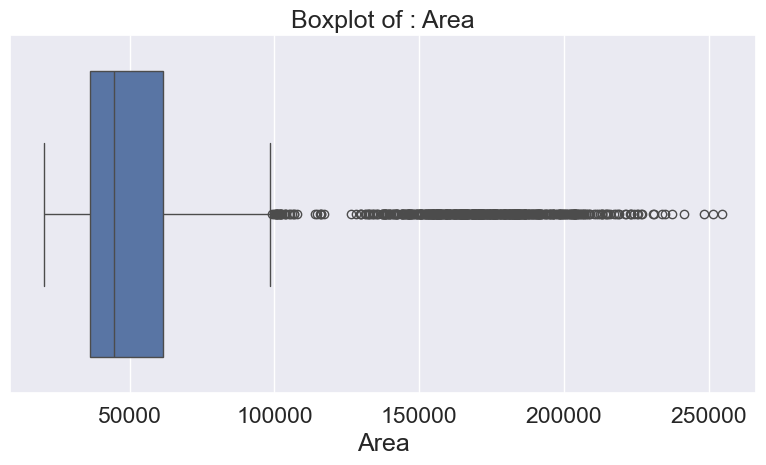

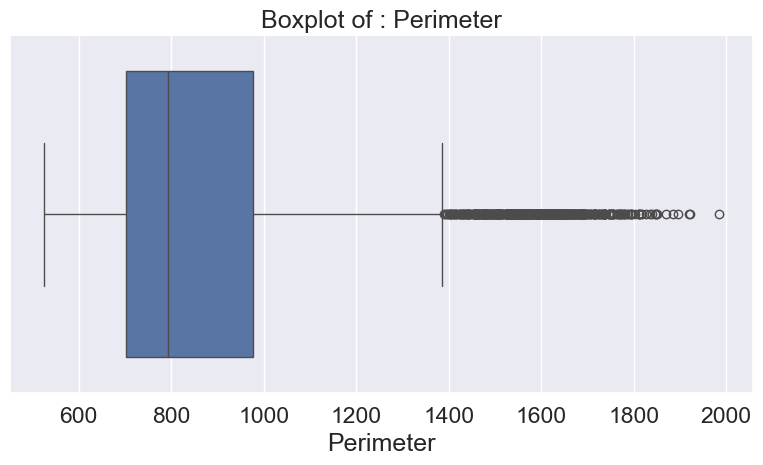

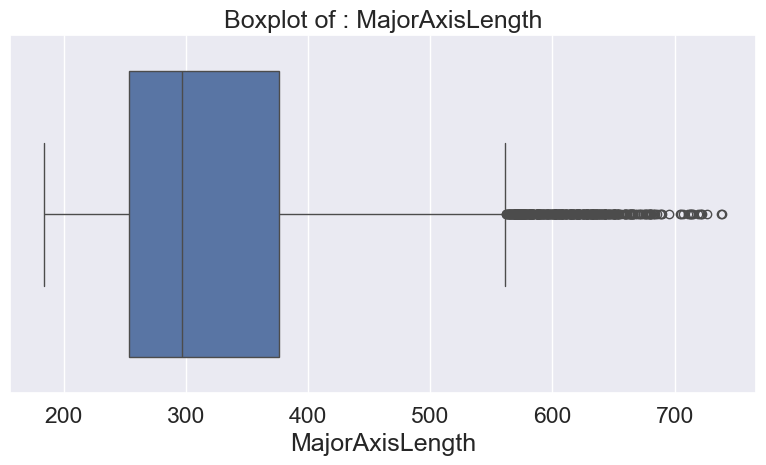

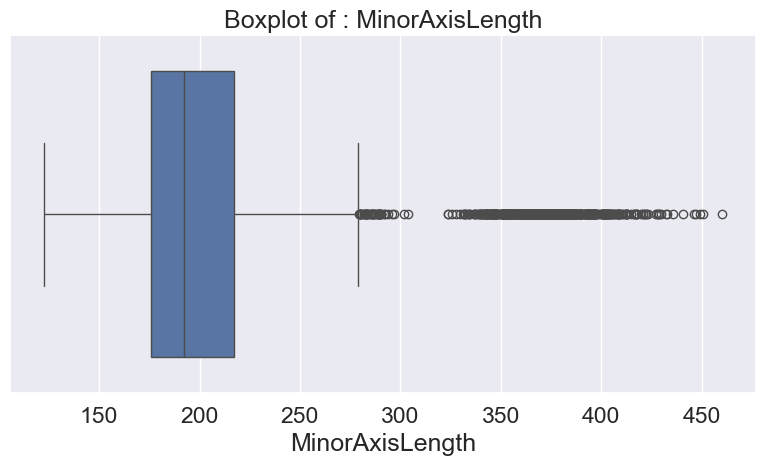

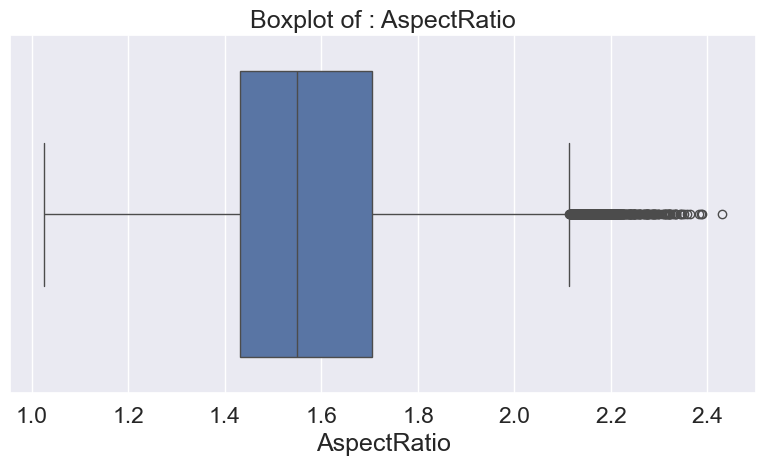

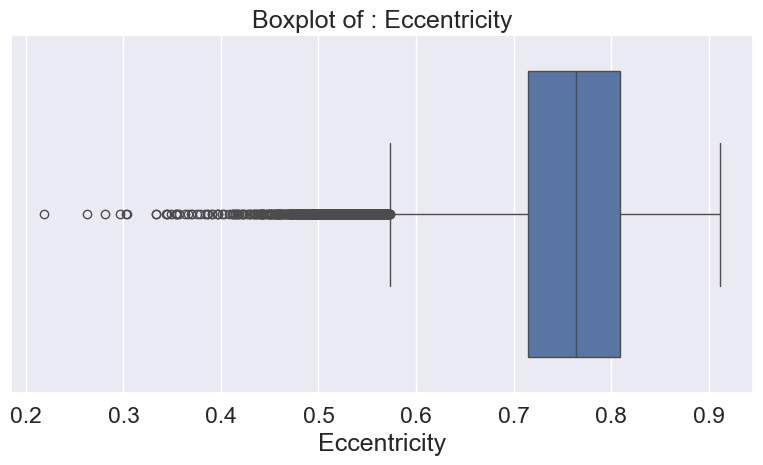

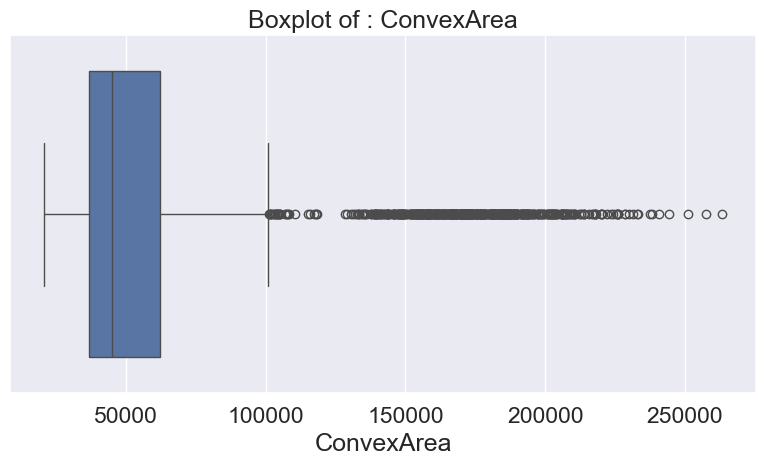

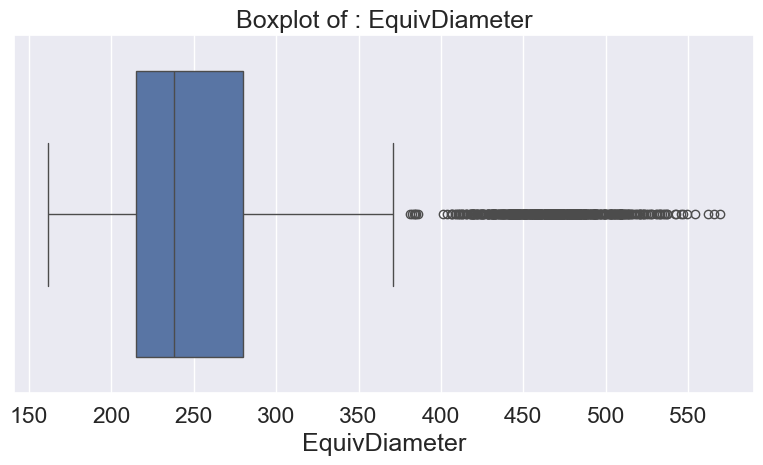

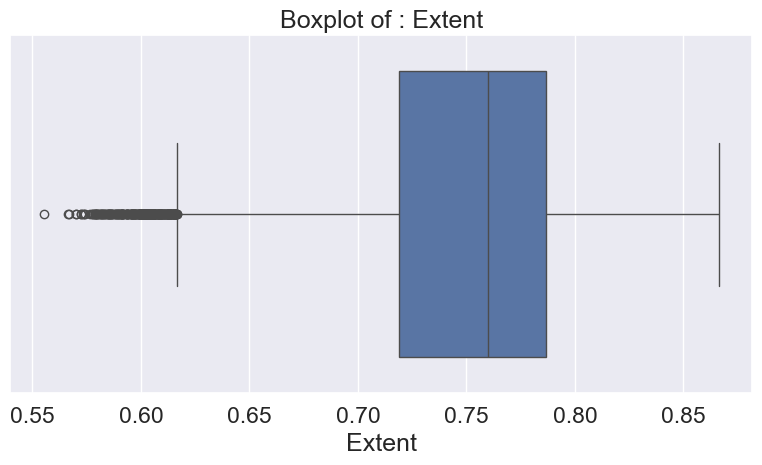

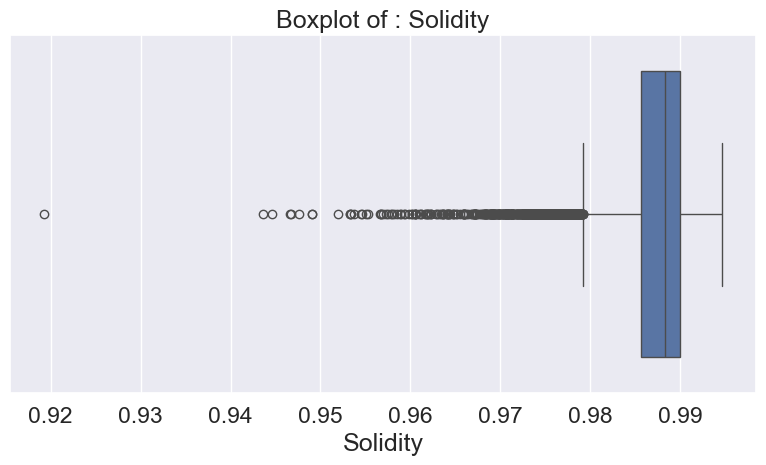

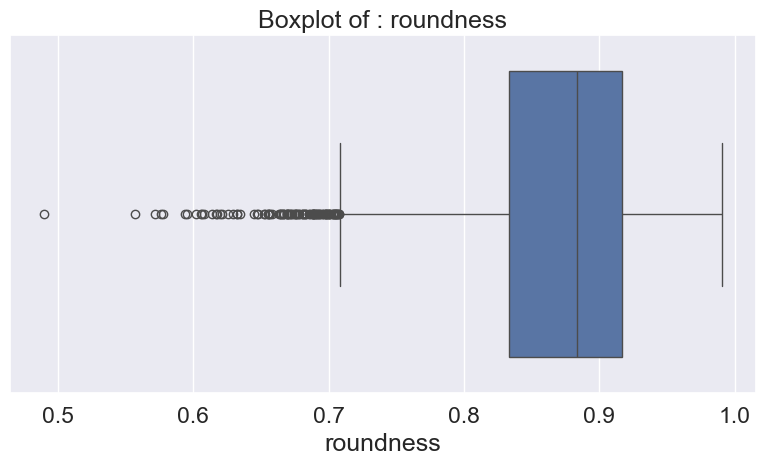

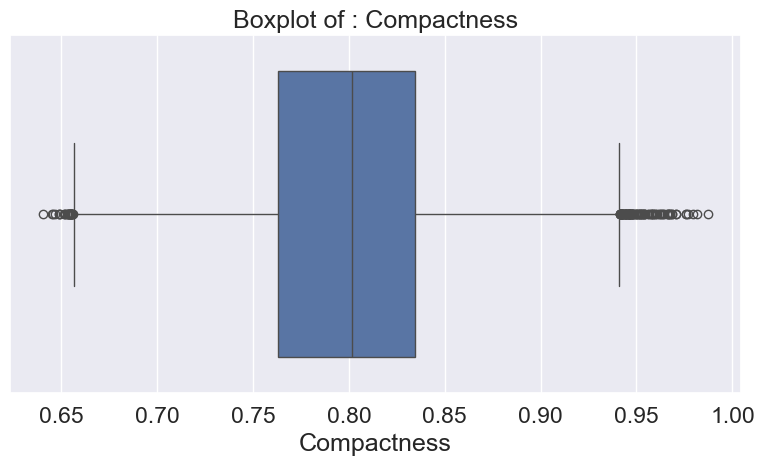

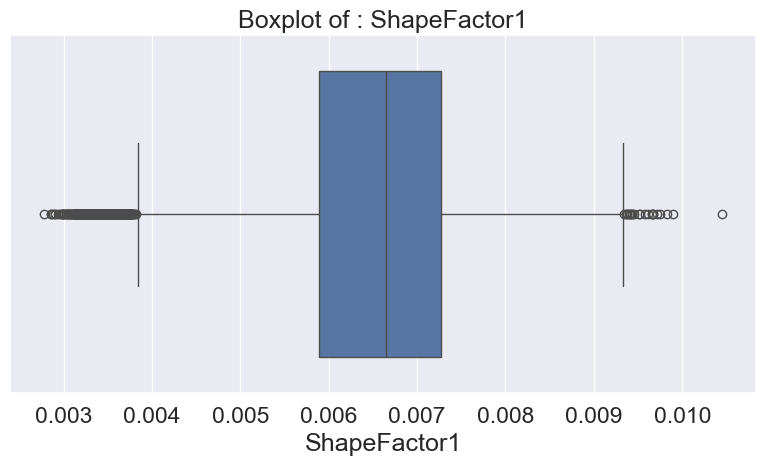

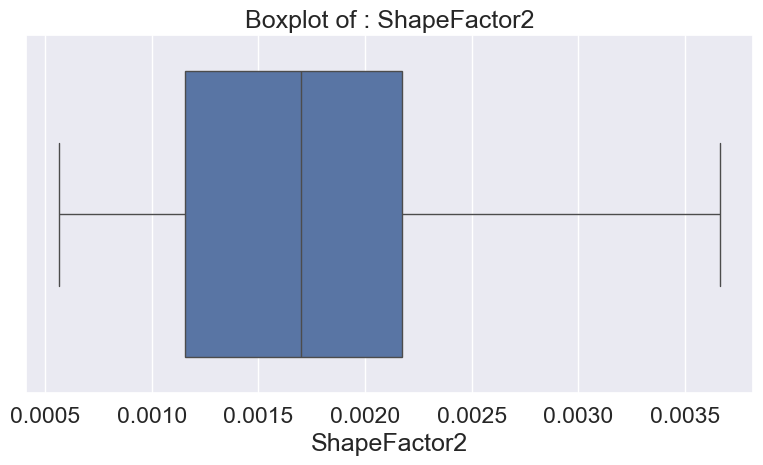

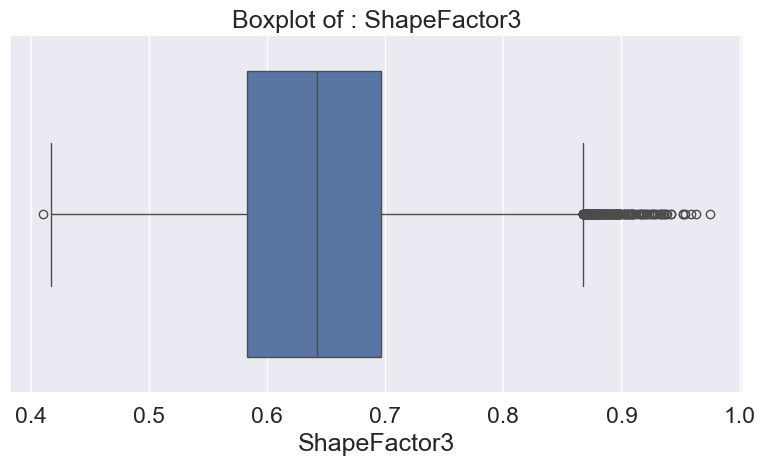

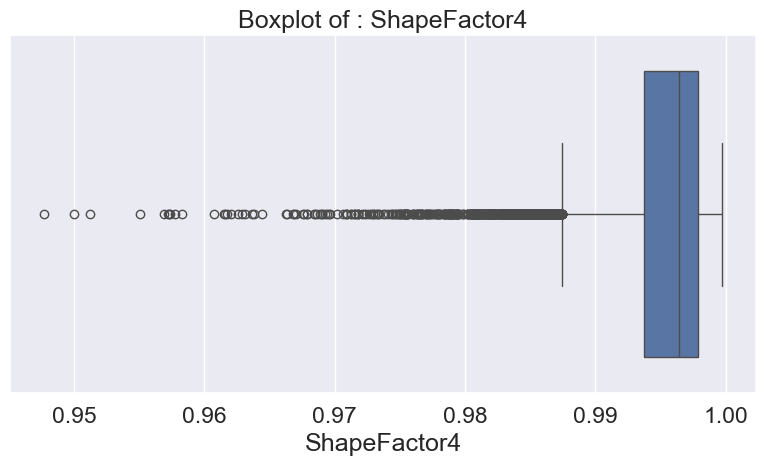

In [83]:
for col in numerical_cols:
    plt.figure(figsize = (8,5))
    sns.boxplot(x = df[col])
    plt.title(f"Boxplot of : {col}")
    plt.tight_layout()
    plt.show()

In [84]:
def detect_outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound) 



total_rows = len(df)
outlier_summary = {}

for col in numerical_cols:
    outlier_mask = detect_outlier_iqr(df[col])
    outlier_count = outlier_mask.sum()
    percentage = (outlier_count / total_rows) * 100


    outlier_summary[col] = {
        'Outlier Count': outlier_count,
        'Percentage' : round(percentage, 2)
    }

print("\nColumn-wise Outlier Percentage:\n")
for col, stats in outlier_summary.items():
    print(f"{col} → {stats['Outlier Count']} outliers ({stats['Percentage']}%) ")



Column-wise Outlier Percentage:

Area → 551 outliers (4.07%) 
Perimeter → 500 outliers (3.69%) 
MajorAxisLength → 379 outliers (2.8%) 
MinorAxisLength → 567 outliers (4.19%) 
AspectRatio → 485 outliers (3.58%) 
Eccentricity → 833 outliers (6.15%) 
ConvexArea → 549 outliers (4.05%) 
EquivDiameter → 526 outliers (3.88%) 
Extent → 271 outliers (2.0%) 
Solidity → 774 outliers (5.72%) 
roundness → 98 outliers (0.72%) 
Compactness → 124 outliers (0.92%) 
ShapeFactor1 → 533 outliers (3.94%) 
ShapeFactor2 → 0 outliers (0.0%) 
ShapeFactor3 → 202 outliers (1.49%) 
ShapeFactor4 → 760 outliers (5.61%) 


# # We will check how many rows have outliers out of the total rows

In [85]:
# Create a mask for rows with at least one outlier
combined_outlier_mask = pd.DataFrame(False, index=df.index, columns=numerical_cols)

for col in numerical_cols:
    combined_outlier_mask[col] = detect_outlier_iqr(df[col])

# Any row with at least one True is a row with an outlier
rows_with_outliers = combined_outlier_mask.any(axis=1)
num_rows_with_outliers = rows_with_outliers.sum()
percentage_rows_with_outliers = (num_rows_with_outliers / total_rows) * 100

print(f"\nTotal rows with at least one outlier: {num_rows_with_outliers} out of {total_rows} "
      f"({percentage_rows_with_outliers:.2f}%)")



Total rows with at least one outlier: 3004 out of 13543 (22.18%)


### We can see that we have 3004 rows have outlier which is 22.18 % of the total data
### So we will treat them using Capping method

In [86]:
df_capped = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_capped[col] = df[col].clip(lower, upper) # capping the values

# Checking outliers after treating

In [87]:
# Recalculate total rows
total_rows = len(df_capped)
outlier_summary_after = {}

# Apply the same detection on capped data
for col in numerical_cols:
    outlier_mask = detect_outlier_iqr(df_capped[col])
    outlier_count = outlier_mask.sum()
    percentage = (outlier_count / total_rows) * 100

    outlier_summary_after[col] = {
        'Outlier Count': outlier_count,
        'Percentage': round(percentage, 2)
    }

# Print the summary
print("\nOutliers AFTER capping:\n")
for col, stats in outlier_summary_after.items():
    print(f"{col} → {stats['Outlier Count']} outliers ({stats['Percentage']}%)")



Outliers AFTER capping:

Area → 0 outliers (0.0%)
Perimeter → 0 outliers (0.0%)
MajorAxisLength → 0 outliers (0.0%)
MinorAxisLength → 0 outliers (0.0%)
AspectRatio → 0 outliers (0.0%)
Eccentricity → 0 outliers (0.0%)
ConvexArea → 0 outliers (0.0%)
EquivDiameter → 0 outliers (0.0%)
Extent → 0 outliers (0.0%)
Solidity → 0 outliers (0.0%)
roundness → 0 outliers (0.0%)
Compactness → 0 outliers (0.0%)
ShapeFactor1 → 0 outliers (0.0%)
ShapeFactor2 → 0 outliers (0.0%)
ShapeFactor3 → 0 outliers (0.0%)
ShapeFactor4 → 0 outliers (0.0%)


# Now we will see for the distribution of all the variables.
# And also check the skewness

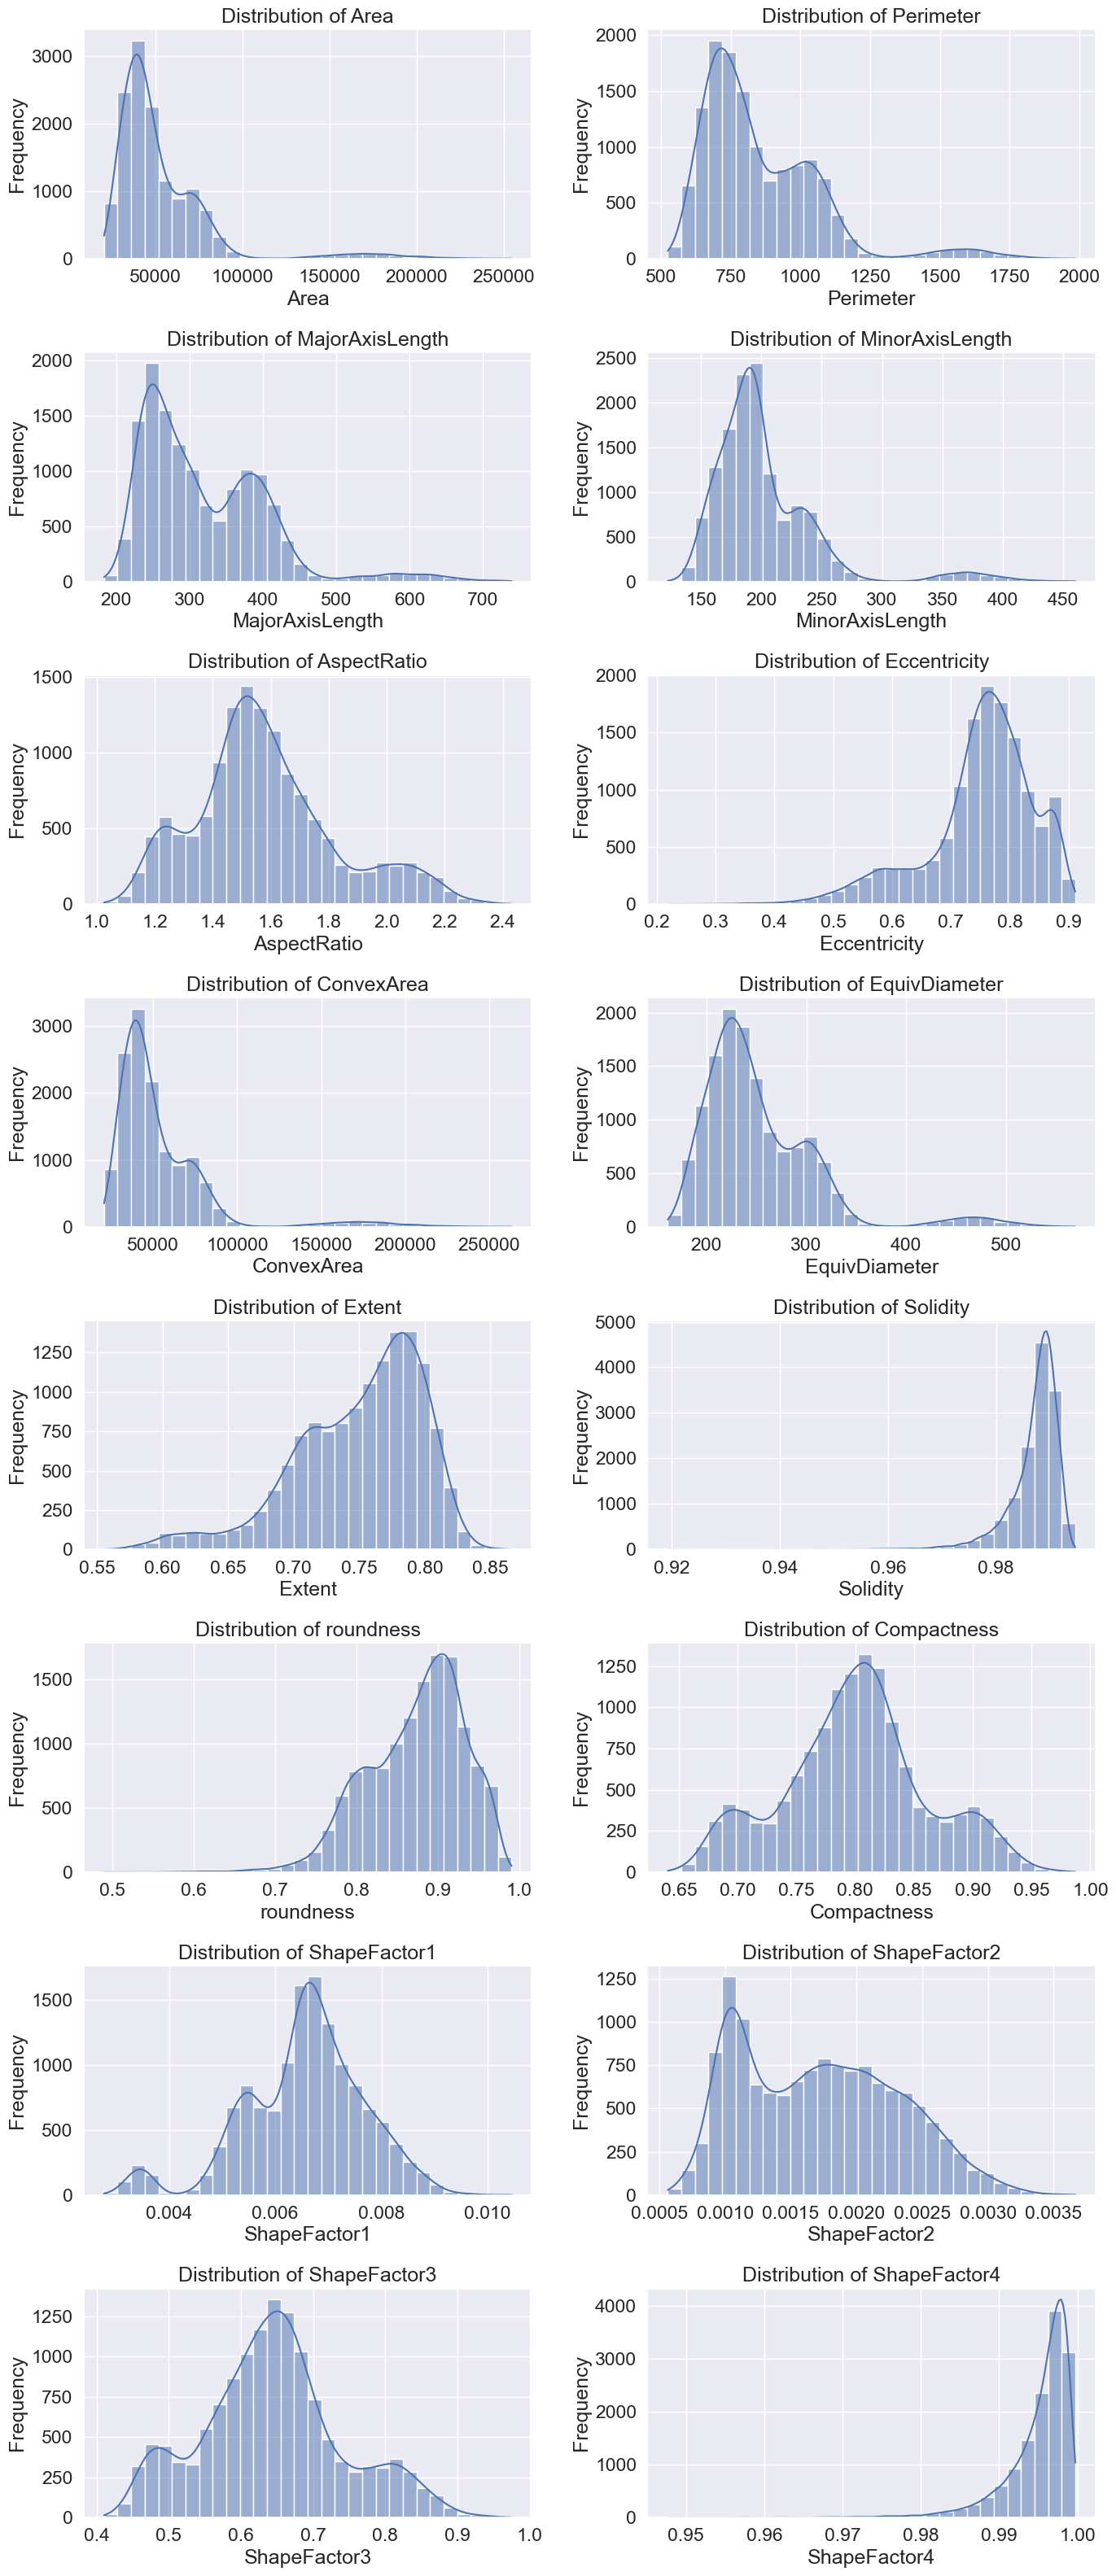

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = df_capped.select_dtypes(include=["number"]).columns.tolist()

# Define subplot grid size
n_cols = 2
n_rows = (len(numerical_cols) + 1) // n_cols  # auto-adjust number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Plot each histogram in a subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# So clearly from the distribution we can see that there is skewness in some of the variables so we will treat them accordingly

In [89]:
# Calculate skewness for numeric columns
skewness = df_capped.select_dtypes(include=["number"]).skew()

# Create a DataFrame to store skewness and categories
skew_df = pd.DataFrame(skewness, columns=['Skewness'])

# Add skewness category based on absolute value
def categorize_skew(value):
    if abs(value) < 0.5:
        return 'Not Skewed'
    elif abs(value) < 1:
        return 'Moderately Skewed'
    else:
        return 'Highly Skewed'

skew_df['Skewness Category'] = skew_df['Skewness'].apply(categorize_skew)

# Display the result
print(skew_df)


                 Skewness  Skewness Category
Area             0.962041  Moderately Skewed
Perimeter        0.966336  Moderately Skewed
MajorAxisLength  0.978854  Moderately Skewed
MinorAxisLength  0.729091  Moderately Skewed
AspectRatio      0.470467         Not Skewed
Eccentricity    -0.614243  Moderately Skewed
ConvexArea       0.969221  Moderately Skewed
EquivDiameter    0.839585  Moderately Skewed
Extent          -0.782121  Moderately Skewed
Solidity        -0.844469  Moderately Skewed
roundness       -0.497000         Not Skewed
Compactness      0.017507         Not Skewed
ShapeFactor1    -0.332581         Not Skewed
ShapeFactor2     0.294332         Not Skewed
ShapeFactor3     0.191359         Not Skewed
ShapeFactor4    -1.039942      Highly Skewed


#### So clearly can see that we have to treat the following columns based on thier skewness value
#### 1) Area             
#### 2) Perimeter        
#### 3) MajorAxisLength  
#### 4) MinorAxisLength
#### 5) Eccentricity    
#### 6) ConvexArea       
#### 7) EquivDiameter   
#### 8) Extent          
#### 9) Solidity
#### 10) ShapeFactor4

In [90]:
from scipy.stats import boxcox

In [91]:
After_Transformation_df = df_capped.copy()
cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'ShapeFactor4']
for col in cols:
    #After_Transformation_df[col] = np.log(After_Transformation_df[col] + 1)
    After_Transformation_df[col], _ = boxcox(After_Transformation_df[col] + 1)  # Adding 1 to avoid log(0)

# Checking the skewness after transformation

In [92]:
# Calculate skewness for numeric columns
skewness = After_Transformation_df.select_dtypes(include=["number"]).skew()

# Create a DataFrame to store skewness and categories
skew_df = pd.DataFrame(skewness, columns=['Skewness'])

# Add skewness category based on absolute value
def categorize_skew(value):
    if abs(value) < 0.5:
        return 'Not Skewed'
    elif abs(value) < 1:
        return 'Moderately Skewed'
    else:
        return 'Highly Skewed'

skew_df['Skewness Category'] = skew_df['Skewness'].apply(categorize_skew)

# Display the result
print(skew_df)


                 Skewness Skewness Category
Area             0.038322        Not Skewed
Perimeter        0.064439        Not Skewed
MajorAxisLength  0.075227        Not Skewed
MinorAxisLength  0.023887        Not Skewed
AspectRatio      0.470467        Not Skewed
Eccentricity    -0.058705        Not Skewed
ConvexArea       0.039984        Not Skewed
EquivDiameter    0.041401        Not Skewed
Extent          -0.088945        Not Skewed
Solidity        -0.098821        Not Skewed
roundness       -0.497000        Not Skewed
Compactness      0.017507        Not Skewed
ShapeFactor1    -0.332581        Not Skewed
ShapeFactor2     0.294332        Not Skewed
ShapeFactor3     0.191359        Not Skewed
ShapeFactor4    -0.224897        Not Skewed


# So clearly there is no skewness after treating it 
## Also there is no categorical variable so we will see how our variables looks like

In [93]:
After_Transformation_df.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  2.249002   0.875861         1.002917         1.021460     1.197191   
1  2.249133   0.875889         1.002727         1.021778     1.097356   
2  2.249375   0.875875         1.003025         1.021536     1.209713   
3  2.249603   0.875897         1.002973         1.021770     1.153638   
4  2.249650   0.875871         1.002761         1.022026     1.060798   

   Eccentricity  ConvexArea  EquivDiameter      Extent      Solidity  \
0      2.583415    2.200552       0.919206  113.441322  1.744955e+62   
1      2.583415    2.200708       0.919226  131.159016  1.145066e+62   
2      2.583415    2.200879       0.919262  125.737116  1.883503e+62   
3      2.583415    2.201209       0.919297  129.949178  6.069333e+61   
4      2.583415    2.201113       0.919304  121.257842  2.177420e+62   

   roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
0   0.958027     0.913358      0.007332      0.003147      0.834222   
1   0.887034     0.941333      0.006979      0.003564      0.867076   
2   0.947849     0.908774      0.007244      0.003048      0.825871   
3   0.903936     0.928329      0.007017      0.003215      0.861794   
4   0.984877     0.941333      0.006697      0.003665      0.867076   

    ShapeFactor4  Class  
0  3.864029e+100  SEKER  
1  3.674243e+100  SEKER  
2  4.097668e+100  SEKER  
3  1.776352e+100  SEKER  
4  4.168500e+100  SEKER

## Since the distribution looks good but there are some variables where the magnitude is bigger
## So we will use Standard Scaler

In [95]:
# Initialize the scaler
scaler = StandardScaler()

# List of columns to scale
cols_to_scale = ['Extent', 'Solidity', 'ShapeFactor4']

# Apply scaler only to selected columns
After_Transformation_df[cols_to_scale] = scaler.fit_transform(After_Transformation_df[cols_to_scale])

# Since our target variable is Class so we have to encode it

In [96]:
# Identify categorical columns
categorical_df = After_Transformation_df.select_dtypes(include = ["object"]).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to all object (categorical) columns
for col in categorical_df:
    After_Transformation_df[col] = le.fit_transform(After_Transformation_df[col])

In [97]:
df_final = After_Transformation_df.copy()

In [98]:
df_final.sample(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
10782  2.248765   0.875864         1.003301         1.020754     1.437836   
6134   2.254637   0.876066         1.005123         1.021461     2.113797   
13536  2.252797   0.875988         1.004088         1.022132     1.405569   
684    2.251872   0.875944         1.003680         1.022141     1.267891   
5713   2.253512   0.876048         1.004754         1.021508     1.883090   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
10782      4.615140    2.200320       0.919170 -0.562419  0.996362   0.928464   
6134       8.375047    2.205578       0.920039 -0.677539  0.772605   0.792947   
13536      4.345978    2.203958       0.919772 -0.927175 -0.179494   0.900161   
684        3.069499    2.203095       0.919636 -0.095505  1.469030   0.963809   
5713       7.357982    2.204644       0.919876  3.073292 -1.516308   0.758840   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
10782     0.833590      0.008120      0.002418      0.694872      1.550745   
6134      0.680147      0.007367      0.000972      0.462600     -0.769747   
13536     0.841870      0.006598      0.002044      0.708746      0.025144   
684       0.887822      0.006567      0.002517      0.788228      1.737701   
5713      0.722499      0.007395      0.001243      0.522005     -1.796424   

       Class  
10782      3  
6134       4  
13536      3  
684        5  
5713       4

# Now we can send it for training and testing

# Dividing it into training and testing

In [99]:
x = df_final.drop('Class', axis = 1)
y = df_final['Class']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [101]:
print(f" x_train shape : {x_train.shape}")
print(f" x_test shape : {x_test.shape}")
print(f" y_train shape : {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 x_train shape : (9480, 16)
 x_test shape : (4063, 16)
 y_train shape : (9480,)
 y_test shape : (4063,)


# Creating the user define function for multiclass Classification

In [102]:
model_names = []
training_scores_accuracy = []
training_scores_precision = []
training_scores_recall = []
training_scores_f1 = []

testing_scores_accuracy = []
testing_scores_precision = []
testing_scores_recall = []
testing_scores_f1 = []
testing_scores_auc = []

In [103]:
def evaluate_classification_model(model, x_train, y_train, x_test, y_test):
    """
    Trains and evaluates a classification model for binary or multiclass classification.
    Prints classification metrics and appends them to global score lists.
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predict
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Determine number of classes
    n_classes = len(np.unique(y_train))  # safer than using y_test only

    # Compute Training Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Compute Testing Metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Append metrics to lists
    model_names.append(model.__class__.__name__)

    training_scores_accuracy.append(train_acc)
    training_scores_precision.append(train_prec)
    training_scores_recall.append(train_rec)
    training_scores_f1.append(train_f1)

    testing_scores_accuracy.append(test_acc)
    testing_scores_precision.append(test_prec)
    testing_scores_recall.append(test_rec)
    testing_scores_f1.append(test_f1)

    # ROC-AUC Score
    auc_display = "ROC-AUC = N/A"
    if hasattr(model, "predict_proba"):
        try:
            y_test_prob = model.predict_proba(x_test)
            if n_classes == 2:
                auc = roc_auc_score(y_test, y_test_prob[:, 1])
            else:
                auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='weighted')
            testing_scores_auc.append(auc)
            auc_display = f"ROC-AUC = {auc:.4f}"
        except Exception as e:
            auc_display = f"ROC-AUC = Error ({e})"
            testing_scores_auc.append(np.nan)
    else:
        testing_scores_auc.append(np.nan)

    # Print summary
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    print(auc_display)
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print("Confusion Matrix (Test Data):")
    print(confusion_matrix(y_test, y_test_pred))
    print("-" * 70)

# Logistic Regression

In [104]:
evaluate_classification_model(
    model = LogisticRegression(max_iter = 1000),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)


Model: LogisticRegression
Train Accuracy: 0.7255 | Test Accuracy: 0.7428
ROC-AUC = 0.9400

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       400
           1       0.47      0.16      0.24       148
           2       0.68      0.75      0.71       500
           3       0.70      0.80      0.75      1068
           4       0.89      0.89      0.89       564
           5       0.93      0.91      0.92       613
           6       0.55      0.52      0.54       770

    accuracy                           0.74      4063
   macro avg       0.73      0.68      0.69      4063
weighted avg       0.74      0.74      0.74      4063

Confusion Matrix (Test Data):
[[300   0   6  28   6   5  55]
 [  3  24  51  12   0   2  56]
 [  1   4 375   1  45   0  74]
 [ 28   8   6 858   4  33 131]
 [  1   0  51   3 502   0   7]
 [  6   1   0  45   0 557   4]
 [  5  14  62 282   4   1 402]]
----------------------------

# Ridge Classifier

In [105]:
from sklearn.linear_model import RidgeClassifier

In [106]:
evaluate_classification_model(
    model=RidgeClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: RidgeClassifier
Train Accuracy: 0.6844 | Test Accuracy: 0.6877
ROC-AUC = N/A

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       400
           1       0.00      0.00      0.00       148
           2       0.62      0.58      0.60       500
           3       0.60      0.86      0.71      1068
           4       0.83      0.93      0.87       564
           5       0.81      0.91      0.86       613
           6       0.47      0.22      0.30       770

    accuracy                           0.69      4063
   macro avg       0.60      0.62      0.60      4063
weighted avg       0.65      0.69      0.65      4063

Confusion Matrix (Test Data):
[[336   0   5  25   6  11  17]
 [  4   0  90   7   0  11  36]
 [  6   0 288  19  86   0 101]
 [ 18   0   5 918   3  89  35]
 [  3   0  22  11 522   0   6]
 [ 10   0   0  42   0 557   4]
 [  6   0  51 508  13  19 173]]
----------------------------------

# Lasso Classifier (Logistic Regression with L1 penalty)

In [107]:
evaluate_classification_model(
    model=LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Train Accuracy: 0.7615 | Test Accuracy: 0.7706
ROC-AUC = 0.9521

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       400
           1       0.50      0.13      0.20       148
           2       0.68      0.75      0.71       500
           3       0.73      0.90      0.81      1068
           4       0.88      0.90      0.89       564
           5       0.93      0.92      0.92       613
           6       0.62      0.47      0.54       770

    accuracy                           0.77      4063
   macro avg       0.75      0.70      0.71      4063
weighted avg       0.76      0.77      0.76      4063

Confusion Matrix (Test Data):
[[339   4   5   2   6   7  37]
 [  7  19  63   1   0   4  54]
 [  4   1 373   0  48   0  74]
 [ 19   5   3 966   4  28  43]
 [  2   0  46   5 506   0   5]
 [ 11   3   0  30   0 563   6]
 [  5   6  62 318  10   4 365]]
----------------------------

# ElasticNet Classifier (Logistic Regression with elasticnet)

In [108]:
evaluate_classification_model(
    model=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Train Accuracy: 0.7357 | Test Accuracy: 0.7524
ROC-AUC = 0.9432

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       400
           1       0.50      0.17      0.25       148
           2       0.68      0.75      0.71       500
           3       0.71      0.82      0.76      1068
           4       0.90      0.89      0.89       564
           5       0.93      0.91      0.92       613
           6       0.56      0.54      0.55       770

    accuracy                           0.75      4063
   macro avg       0.74      0.69      0.70      4063
weighted avg       0.75      0.75      0.75      4063

Confusion Matrix (Test Data):
[[309   1   6  19   6   6  53]
 [  3  25  53   9   0   2  56]
 [  0   4 376   2  43   0  75]
 [ 23   6   6 873   4  30 126]
 [  0   0  52   3 501   0   8]
 [  7   1   0  44   0 557   4]
 [  5  13  60 271   4   1 416]]
----------------------------

# Decision Tree

In [109]:
evaluate_classification_model(
    model=DecisionTreeClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: DecisionTreeClassifier
Train Accuracy: 1.0000 | Test Accuracy: 0.8966
ROC-AUC = 0.9362

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       400
           1       1.00      1.00      1.00       148
           2       0.89      0.92      0.91       500
           3       0.89      0.90      0.90      1068
           4       0.93      0.91      0.92       564
           5       0.93      0.92      0.93       613
           6       0.84      0.84      0.84       770

    accuracy                           0.90      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.90      0.90      0.90      4063

Confusion Matrix (Test Data):
[[351   0  34   0   3   3   9]
 [  0 148   0   0   0   0   0]
 [ 25   0 461   0  11   0   3]
 [  0   0   0 964   5  27  72]
 [  7   0  16   9 512   0  20]
 [  1   0   1  26   0 564  21]
 [  7   0   4  87  19  10 643]]
------------------------

# Random Forest Classifier

In [110]:
evaluate_classification_model(
    model=RandomForestClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: RandomForestClassifier
Train Accuracy: 1.0000 | Test Accuracy: 0.9222
ROC-AUC = 0.9928

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       400
           1       0.99      1.00      1.00       148
           2       0.93      0.94      0.94       500
           3       0.90      0.93      0.92      1068
           4       0.95      0.94      0.95       564
           5       0.95      0.95      0.95       613
           6       0.87      0.85      0.86       770

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063

Confusion Matrix (Test Data):
[[366   0  23   0   3   3   5]
 [  0 148   0   0   0   0   0]
 [ 14   1 472   0  10   0   3]
 [  0   0   0 993   2  21  52]
 [  0   0  11   4 530   0  19]
 [  0   0   0  11   0 582  20]
 [  2   0   2  91  10   9 656]]
------------------------

# Ada Boost Classifier

In [111]:
evaluate_classification_model(
    model=AdaBoostClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: AdaBoostClassifier
Train Accuracy: 0.7076 | Test Accuracy: 0.7037
ROC-AUC = 0.8486

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00       148
           2       0.47      1.00      0.64       500
           3       0.76      0.98      0.86      1068
           4       0.96      0.64      0.77       564
           5       0.93      0.76      0.84       613
           6       0.81      0.64      0.71       770

    accuracy                           0.70      4063
   macro avg       0.56      0.57      0.54      4063
weighted avg       0.69      0.70      0.67      4063

Confusion Matrix (Test Data):
[[   0    0  364    0    0    1   35]
 [ 148    0    0    0    0    0    0]
 [   0    0  498    0    1    0    1]
 [   0    0    0 1042    0   18    8]
 [   0    0  150   35  362    0   17]
 [   0    0    2   91    0  464   56]
 [   0    0   52  

# Gradient Boost Classifier

In [112]:
evaluate_classification_model(
    model=GradientBoostingClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: GradientBoostingClassifier
Train Accuracy: 0.9648 | Test Accuracy: 0.9242
ROC-AUC = 0.9939

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       400
           1       1.00      0.99      0.99       148
           2       0.93      0.95      0.94       500
           3       0.91      0.93      0.92      1068
           4       0.95      0.95      0.95       564
           5       0.95      0.95      0.95       613
           6       0.87      0.86      0.87       770

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063

Confusion Matrix (Test Data):
[[362   0  25   0   3   4   6]
 [  0 146   1   0   1   0   0]
 [ 13   0 473   0  12   0   2]
 [  0   0   1 995   2  18  52]
 [  0   0   9   4 533   0  18]
 [  2   0   0  12   0 580  19]
 [  3   0   1  81  11   8 666]]
--------------------

# XGBoost Classifier

In [113]:
evaluate_classification_model(
    model=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: XGBClassifier
Train Accuracy: 1.0000 | Test Accuracy: 0.9242
ROC-AUC = 0.9942

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       400
           1       1.00      1.00      1.00       148
           2       0.94      0.95      0.95       500
           3       0.91      0.92      0.91      1068
           4       0.96      0.95      0.95       564
           5       0.95      0.95      0.95       613
           6       0.86      0.86      0.86       770

    accuracy                           0.92      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.92      0.92      0.92      4063

Confusion Matrix (Test Data):
[[368   0  21   0   3   3   5]
 [  0 148   0   0   0   0   0]
 [ 10   0 477   0   9   0   4]
 [  0   0   0 985   2  17  64]
 [  0   0  10   5 533   0  16]
 [  1   0   0  10   0 584  18]
 [  2   0   1  88  11   8 660]]
---------------------------------

# CatBoost Classifier

In [114]:
evaluate_classification_model(
    model=CatBoostClassifier(verbose=0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: CatBoostClassifier
Train Accuracy: 0.9859 | Test Accuracy: 0.9281
ROC-AUC = 0.9945

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       400
           1       1.00      1.00      1.00       148
           2       0.94      0.96      0.95       500
           3       0.92      0.92      0.92      1068
           4       0.96      0.94      0.95       564
           5       0.95      0.96      0.95       613
           6       0.86      0.87      0.87       770

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063

Confusion Matrix (Test Data):
[[371   0  21   0   2   1   5]
 [  0 148   0   0   0   0   0]
 [ 10   0 479   0   8   0   3]
 [  0   0   0 984   1  20  63]
 [  0   0  10   4 532   0  18]
 [  1   0   0   8   0 586  18]
 [  0   0   2  79  10   8 671]]
----------------------------

# SVM Classifier

In [115]:
evaluate_classification_model(
    model=SVC(probability=True),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: SVC
Train Accuracy: 0.7044 | Test Accuracy: 0.7211
ROC-AUC = 0.9313

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       400
           1       0.42      0.05      0.10       148
           2       0.67      0.77      0.72       500
           3       0.67      0.77      0.72      1068
           4       0.92      0.89      0.90       564
           5       0.94      0.91      0.92       613
           6       0.54      0.53      0.53       770

    accuracy                           0.72      4063
   macro avg       0.70      0.65      0.65      4063
weighted avg       0.72      0.72      0.71      4063

Confusion Matrix (Test Data):
[[247   0  20  69   5   4  55]
 [  5   8  53  20   1   1  60]
 [  2   4 385   1  34   0  74]
 [ 47   3   8 821   3  30 156]
 [  4   0  50   2 503   0   5]
 [  9   1   0  42   0 557   4]
 [ 22   3  59 273   3   1 409]]
-------------------------------------------

# KNN Classifier

In [116]:
evaluate_classification_model(
    model=KNeighborsClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: KNeighborsClassifier
Train Accuracy: 0.7543 | Test Accuracy: 0.6702
ROC-AUC = 0.8792

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       400
           1       0.21      0.14      0.17       148
           2       0.63      0.71      0.66       500
           3       0.61      0.70      0.65      1068
           4       0.91      0.88      0.90       564
           5       0.94      0.89      0.92       613
           6       0.48      0.41      0.44       770

    accuracy                           0.67      4063
   macro avg       0.63      0.62      0.62      4063
weighted avg       0.66      0.67      0.67      4063

Confusion Matrix (Test Data):
[[237   3  19  85   5   2  49]
 [  8  20  52  22   1   1  44]
 [ 14  29 354  11  39   0  53]
 [ 76  12  11 746   3  29 191]
 [  4   1  53   3 499   0   4]
 [  9   2   0  49   0 548   5]
 [ 39  27  77 303   4   1 319]]
--------------------------

# Voting Regressor Classifier (actually a Voting Classifier)

In [117]:
evaluate_classification_model(
    model=VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('knn', KNeighborsClassifier())
    ], voting='soft'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: VotingClassifier
Train Accuracy: 0.9434 | Test Accuracy: 0.8747
ROC-AUC = 0.9820

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       400
           1       0.97      0.77      0.86       148
           2       0.84      0.91      0.87       500
           3       0.83      0.91      0.87      1068
           4       0.94      0.92      0.93       564
           5       0.96      0.93      0.95       613
           6       0.81      0.77      0.79       770

    accuracy                           0.87      4063
   macro avg       0.90      0.86      0.88      4063
weighted avg       0.88      0.87      0.87      4063

Confusion Matrix (Test Data):
[[331   0  16  14   6   3  30]
 [  0 114  17   8   0   0   9]
 [  5   1 454   4  17   0  19]
 [ 14   1   3 967   2  20  61]
 [  0   0  29   2 521   0  12]
 [  4   0   0  30   0 572   7]
 [  7   1  23 137   6   1 595]]
------------------------------

# Bagging Regressor Classifier (actually a Bagging Classifier)

In [118]:
evaluate_classification_model(
    model=BaggingClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: BaggingClassifier
Train Accuracy: 0.9950 | Test Accuracy: 0.9153
ROC-AUC = 0.9841

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       400
           1       0.99      0.99      0.99       148
           2       0.93      0.94      0.93       500
           3       0.90      0.93      0.91      1068
           4       0.95      0.93      0.94       564
           5       0.94      0.94      0.94       613
           6       0.86      0.83      0.84       770

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063

Confusion Matrix (Test Data):
[[369   0  19   0   5   1   6]
 [  1 147   0   0   0   0   0]
 [ 19   1 468   0   8   0   4]
 [  0   0   0 995   2  22  49]
 [  2   0  12   4 524   0  22]
 [  1   0   0  13   0 579  20]
 [  6   0   3  99  11  14 637]]
-----------------------------

# Naive Bayes

In [119]:
evaluate_classification_model(
    model=GaussianNB(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: GaussianNB
Train Accuracy: 0.8977 | Test Accuracy: 0.9008
ROC-AUC = 0.9912

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       400
           1       1.00      1.00      1.00       148
           2       0.88      0.92      0.90       500
           3       0.93      0.87      0.90      1068
           4       0.95      0.94      0.94       564
           5       0.93      0.94      0.94       613
           6       0.81      0.88      0.84       770

    accuracy                           0.90      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.90      0.90      0.90      4063

Confusion Matrix (Test Data):
[[333   0  51   0   3   1  12]
 [  0 148   0   0   0   0   0]
 [ 28   0 462   0   9   0   1]
 [  0   0   0 928   1  34 105]
 [  0   0  12   5 531   0  16]
 [  2   0   0   4   0 579  28]
 [  6   0   0  60  17   8 679]]
------------------------------------

# Adding Model Names List that I have used

In [121]:

model_names = [
    "Logistic Regression", 
    "Ridge Classifier", 
    "Lasso", 
    "ElasticNet",
    "Decision Tree", 
    "Random Forest", 
    "AdaBoost", 
    "Gradient Boost",
    "XGBoost", 
    "CatBoost", 
    "SVM", 
    "KNN", 
    "Voting Classifier", 
    "Bagging",
    "Naive Bayes"
]

# Creating a DataFrame

In [122]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": testing_scores_accuracy,
    "Precision": testing_scores_precision,
    "Recall": testing_scores_recall,
    "F1 Score": testing_scores_f1
})


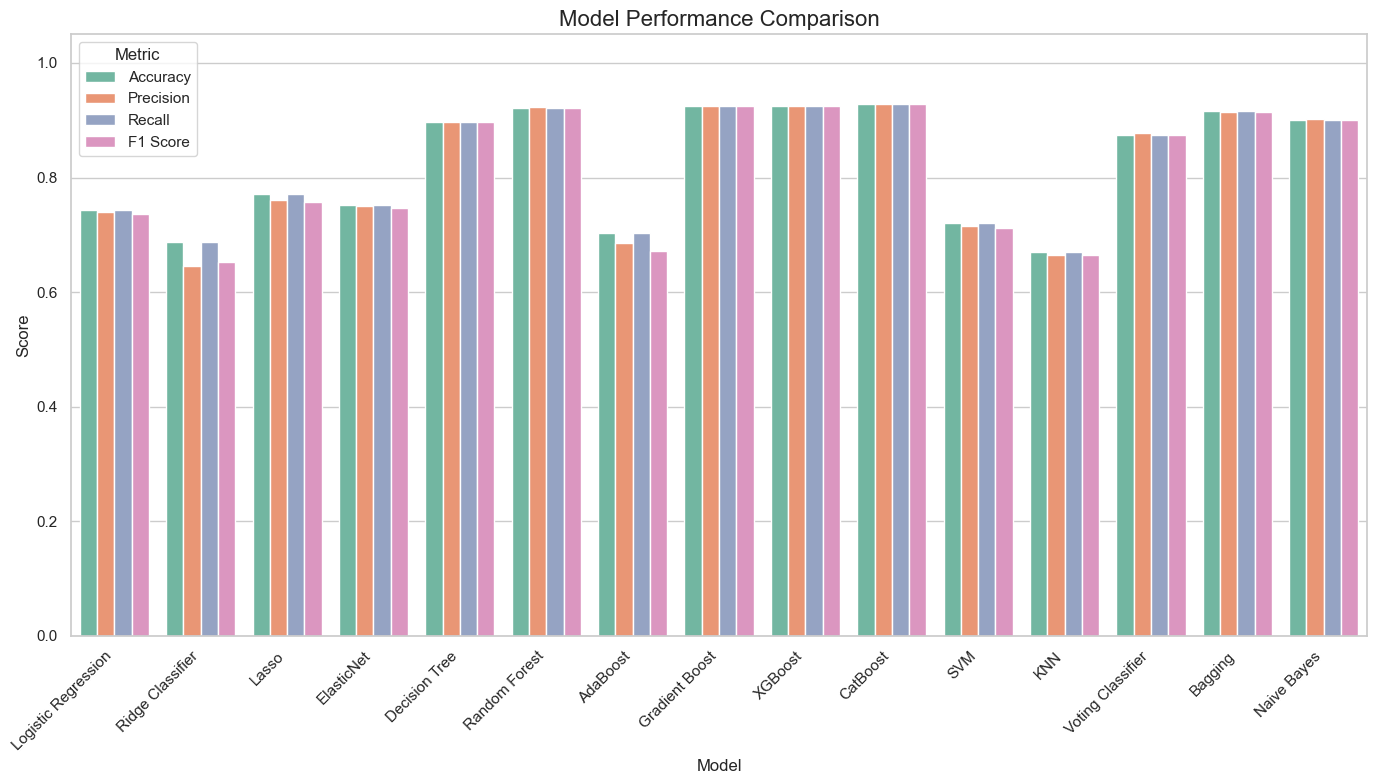

In [124]:
# Step 2: Melt the DataFrame to long format for seaborn
results_melted = pd.melt(results_df, id_vars="Model", 
                         value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                         var_name="Metric", value_name="Score")

# Step 3: Plot grouped bar chart
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Grouped bar plot
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="Set2")

# Rotate x labels for better visibility
plt.xticks(rotation=45, ha="right")
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1.05)  # since scores are between 0 and 1
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [127]:
# Make sure you've defined and imported all models below
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, VotingClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
model_names = [
    "Logistic Regression", 
    "Ridge Classifier", 
    "Lasso (Logistic Regression)", 
    "ElasticNet (Logistic Regression)",
    "Decision Tree", 
    "Random Forest", 
    "AdaBoost", 
    "Gradient Boost",
    "XGBoost", 
    "CatBoost", 
    "SVM", 
    "KNN", 
    "Voting Classifier", 
    "Bagging",
    "Naive Bayes"
]

models = [
    LogisticRegression(max_iter=1000),
    RidgeClassifier(),
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),  # Lasso
    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),  # ElasticNet
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    CatBoostClassifier(verbose=0),
    SVC(probability=True),
    KNeighborsClassifier(),
    VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier())
    ], voting='soft'),
    BaggingClassifier(),
    GaussianNB()
]


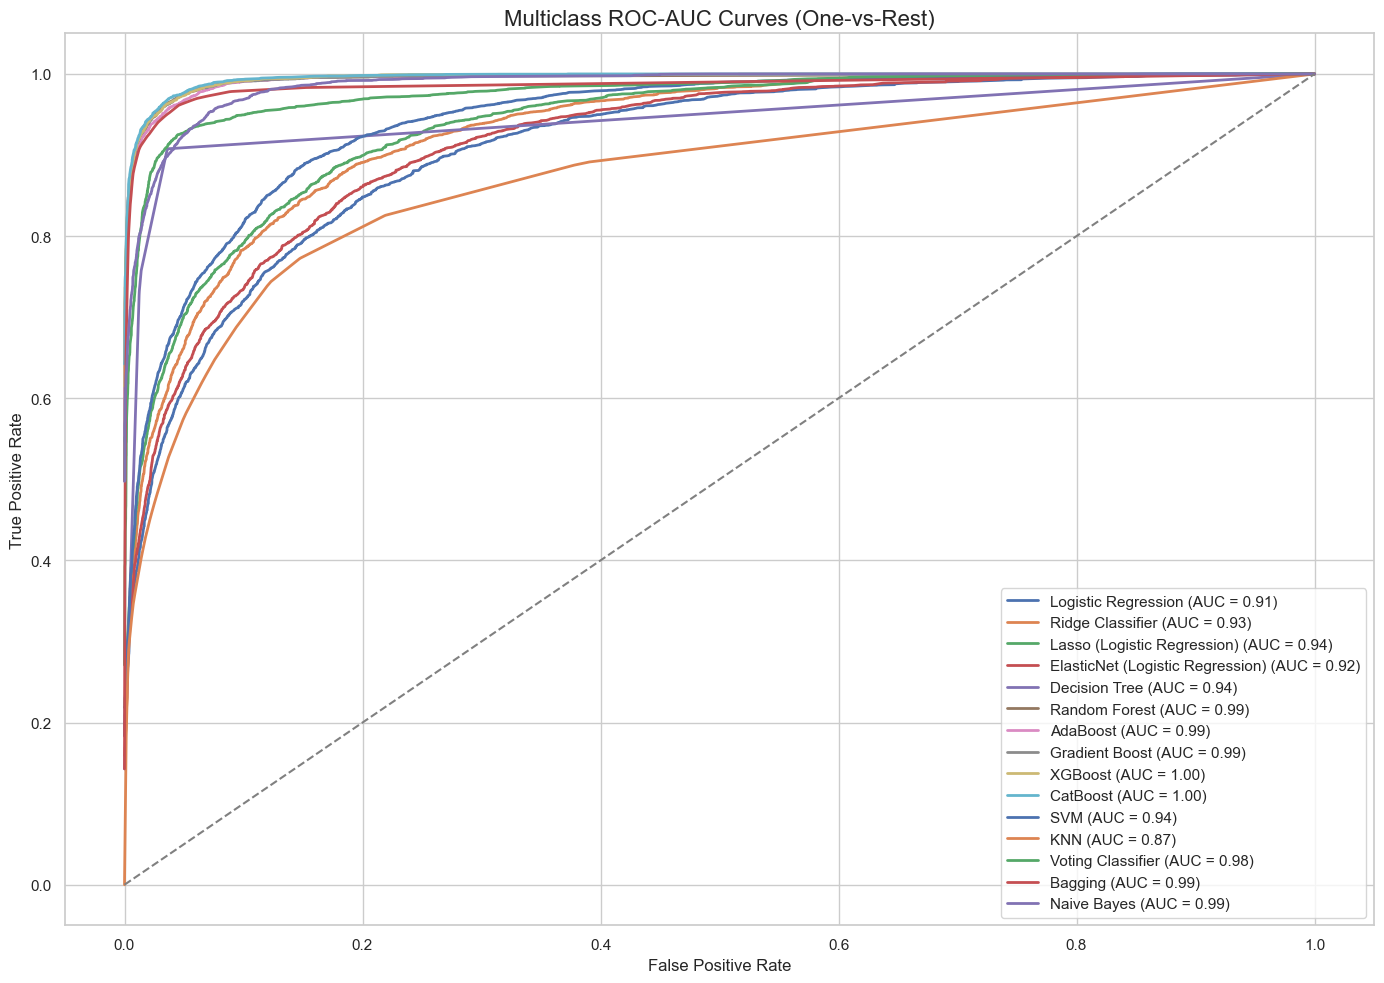

In [129]:
# STEP 1: Encode and binarize target
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g., ['low', 'medium', 'high'] -> [0, 1, 2]
n_classes = len(np.unique(y_encoded))

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y_encoded, test_size=0.3, random_state=15
)

# Binarize test labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))


model_names = [
    "Logistic Regression", 
    "Ridge Classifier", 
    "Lasso (Logistic Regression)", 
    "ElasticNet (Logistic Regression)",
    "Decision Tree", 
    "Random Forest", 
    "AdaBoost", 
    "Gradient Boost",
    "XGBoost", 
    "CatBoost", 
    "SVM", 
    "KNN", 
    "Voting Classifier", 
    "Bagging",
    "Naive Bayes"
]

models = [
    LogisticRegression(max_iter=1000),
    RidgeClassifier(),
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),  # Lasso
    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),  # ElasticNet
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    CatBoostClassifier(verbose=0),
    SVC(probability=True),
    KNeighborsClassifier(),
    VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier())
    ], voting='soft'),
    BaggingClassifier(),
    GaussianNB()
]


# STEP 3: Plot ROC-AUC Curves
plt.figure(figsize=(14, 10))
for name, model in zip(model_names, models):
    try:
        # Skip Lasso and ElasticNet (not classifiers)
        if not hasattr(model, "fit") or name in ["Lasso", "ElasticNet"]:
            print(f"Skipping {name} (regression model)")
            continue

        # Wrap in One-vs-Rest for multiclass ROC
        ovr_model = OneVsRestClassifier(model)
        ovr_model.fit(x_train, label_binarize(y_train, classes=np.arange(n_classes)))

        # Get scores
        if hasattr(ovr_model, "predict_proba"):
            y_score = ovr_model.predict_proba(x_test)
        elif hasattr(ovr_model, "decision_function"):
            y_score = ovr_model.decision_function(x_test)
        else:
            print(f"Skipping {name}: No score method available.")
            continue

        # Compute ROC AUC curve (macro-averaged)
        fpr = dict()
        tpr = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])

        # Average across classes
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes

        roc_auc = auc(all_fpr, mean_tpr)

        # Plot
        plt.plot(all_fpr, mean_tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

    except Exception as e:
        print(f"{name} skipped (error: {e})")

# Diagonal reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Final touches
plt.title("Multiclass ROC-AUC Curves (One-vs-Rest)", fontsize=16)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Using Hyper Parameter Tuning

In [130]:
x = df_final.drop('Class', axis = 1)
y = df_final['Class']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [132]:
print(f" x_train shape : {x_train.shape}")
print(f" x_test shape : {x_test.shape}")
print(f" y_train shape : {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 x_train shape : (9480, 16)
 x_test shape : (4063, 16)
 y_train shape : (9480,)
 y_test shape : (4063,)


In [133]:
model_names = []
training_scores_accuracy = []
training_scores_precision = []
training_scores_recall = []
training_scores_f1 = []

testing_scores_accuracy = []
testing_scores_precision = []
testing_scores_recall = []
testing_scores_f1 = []
testing_scores_auc = []

In [134]:
def evaluate_classification_model(model, x_train, y_train, x_test, y_test):
    """
    Trains and evaluates a classification model for binary or multiclass classification.
    Prints classification metrics and appends them to global score lists.
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predict
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Determine number of classes
    n_classes = len(np.unique(y_train))  # safer than using y_test only

    # Compute Training Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Compute Testing Metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Append metrics to lists
    model_names.append(model.__class__.__name__)

    training_scores_accuracy.append(train_acc)
    training_scores_precision.append(train_prec)
    training_scores_recall.append(train_rec)
    training_scores_f1.append(train_f1)

    testing_scores_accuracy.append(test_acc)
    testing_scores_precision.append(test_prec)
    testing_scores_recall.append(test_rec)
    testing_scores_f1.append(test_f1)

    # ROC-AUC Score
    auc_display = "ROC-AUC = N/A"
    if hasattr(model, "predict_proba"):
        try:
            y_test_prob = model.predict_proba(x_test)
            if n_classes == 2:
                auc = roc_auc_score(y_test, y_test_prob[:, 1])
            else:
                auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='weighted')
            testing_scores_auc.append(auc)
            auc_display = f"ROC-AUC = {auc:.4f}"
        except Exception as e:
            auc_display = f"ROC-AUC = Error ({e})"
            testing_scores_auc.append(np.nan)
    else:
        testing_scores_auc.append(np.nan)

    # Print summary
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    print(auc_display)
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print("Confusion Matrix (Test Data):")
    print(confusion_matrix(y_test, y_test_pred))
    print("-" * 70)

# Hyperparameter using Grid Search CV

# Logistic Regression

In [135]:
log_reg = LogisticRegression(max_iter=200)
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the model
grid_search.fit(x_train, y_train)
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters for Logistic Regression:", best_params)
print("Best Score for Logistic Regression:", best_score)

# After grid search
logistic_regression = grid_search.best_estimator_

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.8680379746835444


In [136]:
evaluate_classification_model(
    model=logistic_regression,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
)


Model: LogisticRegression
Train Accuracy: 0.8738 | Test Accuracy: 0.8703
ROC-AUC = 0.9809

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       400
           1       1.00      0.74      0.85       148
           2       0.79      0.84      0.81       500
           3       0.87      0.94      0.90      1068
           4       0.92      0.92      0.92       564
           5       0.94      0.94      0.94       613
           6       0.81      0.74      0.77       770

    accuracy                           0.87      4063
   macro avg       0.89      0.85      0.87      4063
weighted avg       0.87      0.87      0.87      4063

Confusion Matrix (Test Data):
[[ 346    0    9    0    4    6   35]
 [   9  110   29    0    0    0    0]
 [   7    0  418    0   29    0   46]
 [   7    0    0 1002    2   27   30]
 [   2    0   30    5  518    0    9]
 [  10    0    0   12    0  575   16]
 [   8    0   43  

# Ridge Classifier

In [137]:
# Step 1: Create base RidgeClassifier model
ridge_clf = RidgeClassifier()

# Step 2: Define parameter grid
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],   # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']  # Supported solvers
}

# Step 3: Create GridSearchCV object
grid_search_ridge = GridSearchCV(
    estimator=ridge_clf,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Fit the model
grid_search_ridge.fit(x_train, y_train)

# Step 5: Extract best parameters and score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best Parameters for Ridge Classifier:", best_params_ridge)
print("Best Score for Ridge Classifier:", best_score_ridge)

# After grid search
ridge_classifier = grid_search_ridge.best_estimator_


Best Parameters for Ridge Classifier: {'alpha': 0.1, 'solver': 'auto'}
Best Score for Ridge Classifier: 0.724789029535865


In [138]:
evaluate_classification_model(
    model=ridge_classifier,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
)


Model: RidgeClassifier
Train Accuracy: 0.7289 | Test Accuracy: 0.7330
ROC-AUC = N/A

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       400
           1       0.00      0.00      0.00       148
           2       0.68      0.72      0.70       500
           3       0.63      0.95      0.76      1068
           4       0.85      0.93      0.89       564
           5       0.89      0.92      0.91       613
           6       0.61      0.22      0.33       770

    accuracy                           0.73      4063
   macro avg       0.65      0.66      0.63      4063
weighted avg       0.70      0.73      0.69      4063

Confusion Matrix (Test Data):
[[ 350    0    9    5    6   10   20]
 [  13    0  115    0    0    8   12]
 [   7    0  359    0   69    0   65]
 [  15    0    0 1011    2   36    4]
 [   3    0   18   15  523    0    5]
 [  10    0    0   35    0  564    4]
 [   7    0   28  537   

# Lasso Classifier

In [139]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Create base Lasso Classifier (Logistic Regression with L1 penalty)
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Step 2: Define parameter grid
param_grid_lasso = {
    'C': [0.01, 0.1, 1, 10, 100],   # Inverse of regularization strength
    'solver': ['liblinear']         # liblinear supports l1
}

# Step 3: Create GridSearchCV object
grid_search_lasso = GridSearchCV(
    estimator=lasso_clf,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Fit the model
grid_search_lasso.fit(x_train, y_train)

# Step 5: Extract best parameters and score
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print("Best Parameters for Lasso Classifier:", best_params_lasso)
print("Best Cross-Validated Score (Accuracy):", best_score_lasso)

# Step 6: Get the best estimator
best_lasso_model = grid_search_lasso.best_estimator_

Best Parameters for Lasso Classifier: {'C': 100, 'solver': 'liblinear'}
Best Cross-Validated Score (Accuracy): 0.8958860759493671


In [140]:
# Step 7: Evaluate using your custom function
evaluate_classification_model(
    model=best_lasso_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Train Accuracy: 0.8995 | Test Accuracy: 0.8932
ROC-AUC = 0.9839

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       400
           1       1.00      0.97      0.98       148
           2       0.89      0.86      0.87       500
           3       0.89      0.93      0.91      1068
           4       0.93      0.94      0.94       564
           5       0.94      0.94      0.94       613
           6       0.81      0.79      0.80       770

    accuracy                           0.89      4063
   macro avg       0.91      0.90      0.90      4063
weighted avg       0.89      0.89      0.89      4063

Confusion Matrix (Test Data):
[[345   0  10   0   3   6  36]
 [  4 143   1   0   0   0   0]
 [  9   0 431   0  20   0  40]
 [  5   0   0 995   3  24  41]
 [  1   0  19   4 530   0  10]
 [ 11   0   0   8   0 577  17]
 [  6   0  25 111  13   7 608]]
----------------------------

# Elastic Net Classifier

In [141]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Create base ElasticNet Classifier
elasticnet_clf = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# Step 2: Define parameter grid
param_grid_elastic = {
    'C': [0.1, 1, 10],                         # Regularization strength (inverse)
    'l1_ratio': [0.1, 0.5, 0.9],               # Mix of L1 and L2
    'max_iter': [500, 1000],                   # Max iterations for convergence
    'tol': [1e-4, 1e-3],                       # Convergence tolerance
    'class_weight': [None, 'balanced'],        # For handling imbalance
    'fit_intercept': [True, False],            # Whether to fit the intercept
    'random_state': [3] 
}

# Step 3: Create GridSearchCV
grid_search_elastic = GridSearchCV(
    estimator=elasticnet_clf,
    param_grid=param_grid_elastic,
    cv=5,
    verbose=2,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Fit the grid search
grid_search_elastic.fit(x_train, y_train)

# Step 5: Extract best parameters and score
best_params_elastic = grid_search_elastic.best_params_
best_score_elastic = grid_search_elastic.best_score_

print("Best Parameters for ElasticNet Classifier:", best_params_elastic)
print("Best Cross-Validated Score (Accuracy):", best_score_elastic)

# Step 6: Get the best model
best_elastic_model = grid_search_elastic.best_estimator_


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for ElasticNet Classifier: {'C': 10, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.9, 'max_iter': 1000, 'random_state': 3, 'tol': 0.0001}
Best Cross-Validated Score (Accuracy): 0.7618143459915612


In [142]:
# Step 7: Evaluate using your custom function
evaluate_classification_model(
    model=best_elastic_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Train Accuracy: 0.7665 | Test Accuracy: 0.7780
ROC-AUC = 0.9561

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       400
           1       0.53      0.21      0.30       148
           2       0.68      0.76      0.72       500
           3       0.77      0.85      0.80      1068
           4       0.91      0.89      0.90       564
           5       0.94      0.92      0.93       613
           6       0.61      0.59      0.60       770

    accuracy                           0.78      4063
   macro avg       0.76      0.72      0.73      4063
weighted avg       0.77      0.78      0.77      4063

Confusion Matrix (Test Data):
[[328  10   7   2   5   8  40]
 [  4  31  53   2   0   6  52]
 [  5   4 379   0  38   0  74]
 [ 20   3   5 905   4  21 110]
 [  2   0  51   3 500   0   8]
 [  8   2   0  36   0 562   5]
 [  5   8  60 234   3   4 456]]
----------------------------

# Decision Tree

In [143]:
# Step 1: Define the model
decision_tree_clf = DecisionTreeClassifier(random_state=3)

# Step 2: Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 50],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Classification scoring metric
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Output best hyperparameters
print("Best Parameters for Decision Tree Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_decision_tree_model = grid_search.best_estimator_


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for Decision Tree Classifier: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9133966244725737


In [144]:
evaluate_classification_model(
    model=best_decision_tree_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: DecisionTreeClassifier
Train Accuracy: 0.9277 | Test Accuracy: 0.9072
ROC-AUC = 0.9852

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       400
           1       0.99      1.00      1.00       148
           2       0.90      0.92      0.91       500
           3       0.90      0.91      0.91      1068
           4       0.94      0.95      0.94       564
           5       0.95      0.93      0.94       613
           6       0.83      0.86      0.84       770

    accuracy                           0.91      4063
   macro avg       0.92      0.92      0.92      4063
weighted avg       0.91      0.91      0.91      4063

Confusion Matrix (Test Data):
[[345   0  39   0   4   1  11]
 [  0 148   0   0   0   0   0]
 [ 18   1 460   0  19   0   2]
 [  0   0   0 970   0  17  81]
 [  3   0   7   4 533   0  17]
 [  2   0   0  18   0 570  23]
 [  2   0   3  83  12  10 660]]
------------------------

# Random Forest

In [145]:
# Step 1: Initialize the classifier
random_forest_classifier = RandomForestClassifier(random_state=3, n_jobs=-1)

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'max_depth': [None, 5, 10, 15],       # Max tree depth
    'min_samples_split': [2, 5, 10],      # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Min samples at a leaf node
    'max_features': ['sqrt', 'log2'],     # Features to consider at each split
}

# Step 3: Define GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_classifier,
    param_grid=param_grid,
    scoring='accuracy',    # Use accuracy for classification
    cv=3,                  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the grid search
grid_search.fit(x_train, y_train)

# Step 5: Output best hyperparameters
print("Best Parameters for Random Forest Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_random_forest_model = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters for Random Forest Classifier: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9239451476793249


In [146]:
# Step 7: Evaluate the best model
evaluate_classification_model(
    model=best_random_forest_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: RandomForestClassifier
Train Accuracy: 0.9749 | Test Accuracy: 0.9230
ROC-AUC = 0.9932

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       400
           1       0.99      1.00      1.00       148
           2       0.92      0.95      0.93       500
           3       0.91      0.93      0.92      1068
           4       0.96      0.93      0.95       564
           5       0.94      0.95      0.94       613
           6       0.87      0.87      0.87       770

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063

Confusion Matrix (Test Data):
[[361   0  28   0   3   2   6]
 [  0 148   0   0   0   0   0]
 [ 13   1 474   0   9   0   3]
 [  0   0   0 992   2  25  49]
 [  0   0  12   4 527   0  21]
 [  1   0   0  13   0 581  18]
 [  1   0   1  82   9  10 667]]
------------------------

# Support Vector Regressor

In [147]:
# Step 1: Initialize the model
svc_model = SVC()

# Step 2: Define the hyperparameter grid
param_grid = {
    'kernel': ['rbf', 'linear'],     # Kernel type
    'C': [0.1, 1, 10],               # Regularization parameter
    'gamma': ['scale', 'auto']      # Kernel coefficient (for 'rbf' & 'poly')
    # 'epsilon' is not applicable for SVC (it's only used in SVR)
}

# Step 3: Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid,
    scoring='accuracy',    # Use accuracy for classification
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Get best parameters and score
print("Best Parameters for SVC:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Extract the best model
best_svc_model = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7659282700421941


In [148]:
# Step 7: Evaluate the selected model
evaluate_classification_model(
    model=best_svc_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: SVC
Train Accuracy: 0.7774 | Test Accuracy: 0.7913
ROC-AUC = N/A

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       400
           1       0.60      0.24      0.35       148
           2       0.70      0.78      0.74       500
           3       0.78      0.84      0.81      1068
           4       0.92      0.88      0.90       564
           5       0.94      0.91      0.93       613
           6       0.63      0.65      0.64       770

    accuracy                           0.79      4063
   macro avg       0.78      0.74      0.75      4063
weighted avg       0.79      0.79      0.79      4063

Confusion Matrix (Test Data):
[[340   6   6   1   5   5  37]
 [  4  36  52   1   0   3  52]
 [  3   6 390   0  36   0  65]
 [ 21   3   4 892   2  23 123]
 [  2   1  53   2 498   0   8]
 [  6   1   0  41   0 558   7]
 [  5   7  53 200   2   2 501]]
----------------------------------------------

# KNearest Neighbour

In [149]:
# Step 1: Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Step 2: Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),                       # Number of neighbors to try
    'weights': ['uniform', 'distance'],                # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski'], # Distance metrics
    'p': [1, 2, 3]                                      # Power parameter for Minkowski
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=param_grid,
    scoring='accuracy',       # Use accuracy for classification
    cv=3,                     # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                 # Use all cores
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Display best parameters and best score
print("Best Parameters for KNN Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Extract best model
best_knn_model = grid_search.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best Parameters for KNN Classifier: {'metric': 'manhattan', 'n_neighbors': 23, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.705590717299578


In [150]:
# Step 7: Evaluate best model
evaluate_classification_model(
    model=best_knn_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: KNeighborsClassifier
Train Accuracy: 1.0000 | Test Accuracy: 0.7172
ROC-AUC = 0.9233

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       400
           1       0.44      0.09      0.16       148
           2       0.67      0.78      0.72       500
           3       0.66      0.75      0.70      1068
           4       0.91      0.90      0.90       564
           5       0.95      0.91      0.93       613
           6       0.52      0.54      0.53       770

    accuracy                           0.72      4063
   macro avg       0.70      0.65      0.66      4063
weighted avg       0.72      0.72      0.71      4063

Confusion Matrix (Test Data):
[[240   1  21  68   8   4  58]
 [  3  14  54  24   0   0  53]
 [  3   8 388   3  36   0  62]
 [ 42   1   6 797   2  25 195]
 [  4   0  49   3 506   0   2]
 [  6   0   0  45   0 556   6]
 [ 19   8  65 259   5   1 413]]
--------------------------

# Ensemble Learning methods

# Voting Regressor

In [151]:
# Step 1: Define base classifiers
model1 = LogisticRegression(
    C=10,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=3
)

model2 = RandomForestClassifier(
    criterion='gini',
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=3,
    n_jobs=-1
)

model3 = KNeighborsClassifier(
    n_neighbors=2,
    weights='distance',
    metric='manhattan',
    p=1,
    n_jobs=-1
)

# Step 2: Combine models in a Voting Classifier (using soft voting)
voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('knn', model3)],
    voting='soft'
)

# Step 3: Fit the model
voting_classifier.fit(x_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 random_state=3)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150,
                                                     n_jobs=-1,
                                                     random_state=3)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_jobs=-1, n_neighbors=2,
                                                   p=1, weights='distance'))],
                 voting='soft')

In [152]:
# Step 4: Evaluate using the existing function
evaluate_classification_model(
    model=voting_classifier,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: VotingClassifier
Train Accuracy: 1.0000 | Test Accuracy: 0.8568
ROC-AUC = 0.9802

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       400
           1       0.95      0.62      0.75       148
           2       0.81      0.87      0.84       500
           3       0.82      0.89      0.85      1068
           4       0.94      0.91      0.93       564
           5       0.96      0.93      0.95       613
           6       0.77      0.74      0.75       770

    accuracy                           0.86      4063
   macro avg       0.88      0.83      0.85      4063
weighted avg       0.86      0.86      0.86      4063

Confusion Matrix (Test Data):
[[343   0  15  10   4   3  25]
 [  0  92  27  10   0   1  18]
 [  4   1 436   3  21   0  35]
 [ 16   1   2 954   3  17  75]
 [  0   0  34   4 516   0  10]
 [  3   0   0  29   0 573   8]
 [  6   3  26 158   7   3 567]]
------------------------------

# Bagging Regressor

In [153]:
# Step 1: Initialize the base classifier
base_classifier = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=None,
    random_state=3,
    max_leaf_nodes=50,
    ccp_alpha=0.01
)

# Step 2: Create the Bagging Classifier
bagging_classifier = BaggingClassifier(
    estimator=base_classifier,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=3,
    n_jobs=-1
)

# Step 3: Fit the model
bagging_classifier.fit(x_train, y_train)



BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10,
                                                   max_leaf_nodes=50,
                                                   min_samples_leaf=10,
                                                   random_state=3),
                  max_features=0.8, max_samples=0.8, n_estimators=50, n_jobs=-1,
                  random_state=3)

In [154]:
# Step 4: Evaluate the model using your function
evaluate_classification_model(
    model=bagging_classifier,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: BaggingClassifier
Train Accuracy: 0.8924 | Test Accuracy: 0.8880
ROC-AUC = 0.9884

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       400
           1       1.00      1.00      1.00       148
           2       0.88      0.81      0.85       500
           3       0.89      0.92      0.91      1068
           4       0.92      0.89      0.91       564
           5       0.95      0.91      0.93       613
           6       0.81      0.85      0.83       770

    accuracy                           0.89      4063
   macro avg       0.90      0.90      0.90      4063
weighted avg       0.89      0.89      0.89      4063

Confusion Matrix (Test Data):
[[352   0  29   0   4   2  13]
 [  0 148   0   0   0   0   0]
 [ 53   0 407   0  36   0   4]
 [  0   0   0 983   0  20  65]
 [  4   0  19   4 503   0  34]
 [  2   0   0  19   0 557  35]
 [  0   0   6  96   1   9 658]]
-----------------------------

# Ada Boosting

In [155]:
# Step 1: Define base estimator
base_estimator = DecisionTreeClassifier()

# Step 2: Define AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Step 3: Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],                 # Number of boosting rounds
    'learning_rate': [0.1, 0.5, 1.0],               # Learning rate
    'estimator__max_depth': [1, 2, 3],              # Max depth of weak learner
    'estimator__min_samples_split': [2, 5, 10]      # Min samples to split
}

# Step 4: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 5: Fit the model
grid_search.fit(x_train, y_train)

# Step 6: Output best parameters and best score
print("Best parameters for AdaBoost Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 7: Get the best model
best_adaboost_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for AdaBoost Classifier: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'learning_rate': 0.5, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.8889240506329114


In [156]:
# Step 8: Evaluate the best model using your function
evaluate_classification_model(
    model=best_adaboost_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: AdaBoostClassifier
Train Accuracy: 0.8917 | Test Accuracy: 0.8885
ROC-AUC = 0.9823

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       400
           1       1.00      0.99      1.00       148
           2       0.88      0.90      0.89       500
           3       0.84      0.94      0.89      1068
           4       0.92      0.93      0.92       564
           5       0.95      0.85      0.90       613
           6       0.87      0.80      0.83       770

    accuracy                           0.89      4063
   macro avg       0.91      0.90      0.90      4063
weighted avg       0.89      0.89      0.89      4063

Confusion Matrix (Test Data):
[[ 352    0   37    0    1    0   10]
 [   1  147    0    0    0    0    0]
 [  35    0  450    0   13    0    2]
 [   0    0    0 1002   10   14   42]
 [   1    0   23    4  522    0   14]
 [  10    0    0   58    0  520   25]
 [   0    0    1  

# GradientBoosting Regression

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of boosting stages
    'max_depth': [2, 3, 4],                   # Maximum tree depth
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'learning_rate': [0.01, 0.1, 0.2]         # Learning rate
}

# Step 2: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=3),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 3: Fit the model
grid_search.fit(x_train, y_train)

# Step 4: Output best parameters and cross-validation score
print("Best Parameters for Gradient Boosting Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 5: Get the best estimator
best_gb_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9254219409282701


In [158]:
# Step 6: Evaluate the best model using your function
evaluate_classification_model(
    model=best_gb_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: GradientBoostingClassifier
Train Accuracy: 0.9985 | Test Accuracy: 0.9222
ROC-AUC = 0.9937

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       400
           1       1.00      0.99      1.00       148
           2       0.93      0.94      0.94       500
           3       0.90      0.92      0.91      1068
           4       0.96      0.95      0.95       564
           5       0.96      0.95      0.95       613
           6       0.86      0.86      0.86       770

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063

Confusion Matrix (Test Data):
[[367   0  24   0   2   1   6]
 [  0 147   1   0   0   0   0]
 [ 13   0 472   0  11   0   4]
 [  0   0   0 986   3  19  60]
 [  1   0   9   4 533   0  17]
 [  3   0   0  10   1 580  19]
 [  0   0   3  92   8   5 662]]
--------------------

# XGB Regression

In [159]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    random_state=3,
    use_label_encoder=False,
    eval_metric='logloss'  # To suppress warning
)

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],               # Number of boosting rounds
    'learning_rate': [0.1, 0.5],             # Step size shrinkage
    'max_depth': [3, 5],                     # Maximum depth of a tree
    'min_child_weight': [1, 3],              # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1],                       # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 1.0],                 # Subsample ratio of training instances
    'colsample_bytree': [0.8, 1.0],          # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0.1, 1.0],                 # L1 regularization term
    'reg_lambda': [1.0, 2.0]                 # L2 regularization term
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model to training data
grid_search.fit(x_train, y_train)

# Step 5: Output best hyperparameters and best score
print("Best Parameters for XGBClassifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_xgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 512 candidates, totalling 1536 fits
Best Parameters for XGBClassifier: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9283755274261604


In [160]:
# Step 7: Evaluate the best model using your function
evaluate_classification_model(
    model=best_xgb_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: XGBClassifier
Train Accuracy: 0.9444 | Test Accuracy: 0.9249
ROC-AUC = 0.9943

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       400
           1       1.00      1.00      1.00       148
           2       0.93      0.95      0.94       500
           3       0.91      0.93      0.92      1068
           4       0.96      0.94      0.95       564
           5       0.95      0.95      0.95       613
           6       0.86      0.86      0.86       770

    accuracy                           0.92      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.92      0.92      4063

Confusion Matrix (Test Data):
[[365   0  25   0   3   1   6]
 [  0 148   0   0   0   0   0]
 [ 10   0 477   0   9   0   4]
 [  0   0   0 993   0  18  57]
 [  0   0  10   4 530   0  20]
 [  2   0   0   9   0 584  18]
 [  1   0   3  86  10   9 661]]
---------------------------------

# CatBoost Regression

In [161]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Step 0: Ensure CatBoost gets DataFrame input (not NumPy array)
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

# Step 1: Define the CatBoost Classifier
catboost_clf = CatBoostClassifier(
    verbose=0,
    random_state=3
)

# Step 2: Define the parameter grid
param_grid = {
    'iterations': [100, 150],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3],
    'bagging_temperature': [0, 1],
    'colsample_bylevel': [0.6, 1.0]
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model on training data
grid_search.fit(x_train_df, y_train)

# Step 5: Output best parameters and best cross-validated score
print("Best Parameters for CatBoost Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_catboost_model = grid_search.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters for CatBoost Classifier: {'bagging_temperature': 0, 'colsample_bylevel': 1.0, 'depth': 6, 'iterations': 150, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Cross-Validation Accuracy: 0.9279535864978904


In [162]:
# Step 7: Evaluate using your predefined function
evaluate_classification_model(
    model=best_catboost_model,
    x_train=x_train_df,
    y_train=y_train,
    x_test=x_test_df,
    y_test=y_test
)


Model: CatBoostClassifier
Train Accuracy: 0.9475 | Test Accuracy: 0.9296
ROC-AUC = 0.9947

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       400
           1       0.99      1.00      1.00       148
           2       0.94      0.96      0.95       500
           3       0.91      0.93      0.92      1068
           4       0.97      0.94      0.95       564
           5       0.96      0.95      0.96       613
           6       0.87      0.87      0.87       770

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063

Confusion Matrix (Test Data):
[[369   0  21   0   3   1   6]
 [  0 148   0   0   0   0   0]
 [  7   1 482   0   5   0   5]
 [  0   0   0 996   1  18  53]
 [  0   0  11   3 529   0  21]
 [  1   0   0  10   0 585  17]
 [  0   0   0  84  10   8 668]]
----------------------------

# Visualization

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model names and objects
model_dict = {
    "Logistic Regression": logistic_regression,
    "Ridge Classifier": ridge_classifier,
    "Lasso": best_lasso_model,
    "ElasticNet": best_elastic_model,
    "Decision Tree": best_decision_tree_model,
    "Random Forest": best_random_forest_model,
    "SVM": best_svc_model,
    "KNN": best_knn_model,
    "Voting Classifier": voting_classifier,
    "Bagging": bagging_classifier,
    "AdaBoost": best_adaboost_model,
    "Gradient Boost": best_gb_model,
    "XGBoost": best_xgb_model,
    "CatBoost": best_catboost_model
}

In [166]:
# Create empty lists to store scores
model_names = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop over all models
for name, model in model_dict.items():
    y_pred = model.predict(x_test)  # assuming you have x_test and y_test
    model_names.append(name)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred, average='weighted'))
    recall_list.append(recall_score(y_test, y_pred, average='weighted'))
    f1_list.append(f1_score(y_test, y_pred, average='weighted'))


# Create DataFrame & Plot Bar Graph

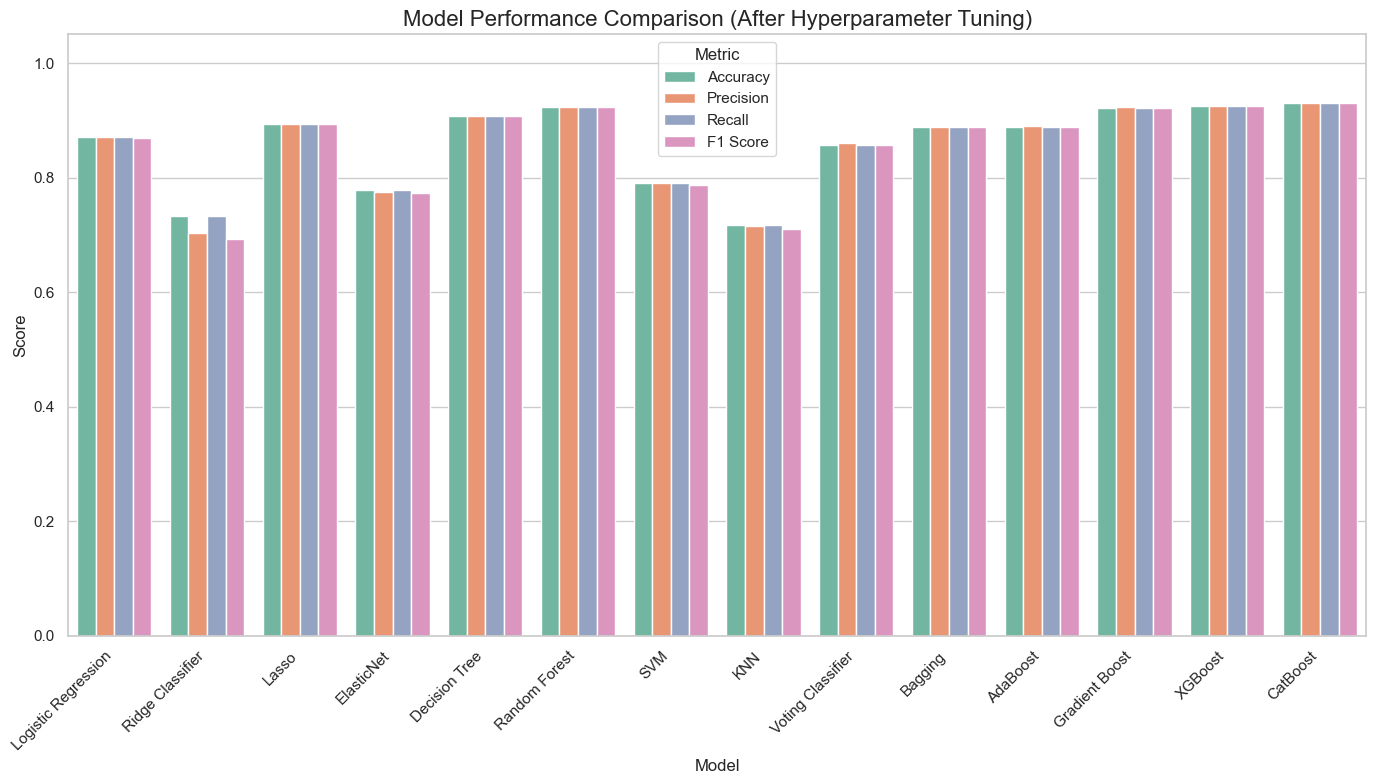

In [167]:
# Create DataFrame
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list
})

# Melt for plotting
results_melted = pd.melt(results_df, id_vars="Model", 
                         value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                         var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="Set2")

plt.xticks(rotation=45, ha="right")
plt.title("Model Performance Comparison (After Hyperparameter Tuning)", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1.05)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [171]:
from xgboost import XGBClassifier

# Detect number of classes
classes = np.unique(y_train)
n_classes = len(classes)

# Re-define XGBoost correctly
best_xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=n_classes,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Re-define your model dictionary (replace with your actual models)
model_dict = {
    "Logistic Regression": logistic_regression,
    "Ridge Classifier": ridge_classifier,
    "Lasso": best_lasso_model,
    "ElasticNet": best_elastic_model,
    "Decision Tree": best_decision_tree_model,
    "Random Forest": best_random_forest_model,
    "SVM": best_svc_model,
    "KNN": best_knn_model,
    "Voting Classifier": voting_classifier,
    "Bagging": bagging_classifier,
    "AdaBoost": best_adaboost_model,
    "Gradient Boost": best_gb_model,
    "XGBoost": best_xgb_model,
    "CatBoost": best_catboost_model
}


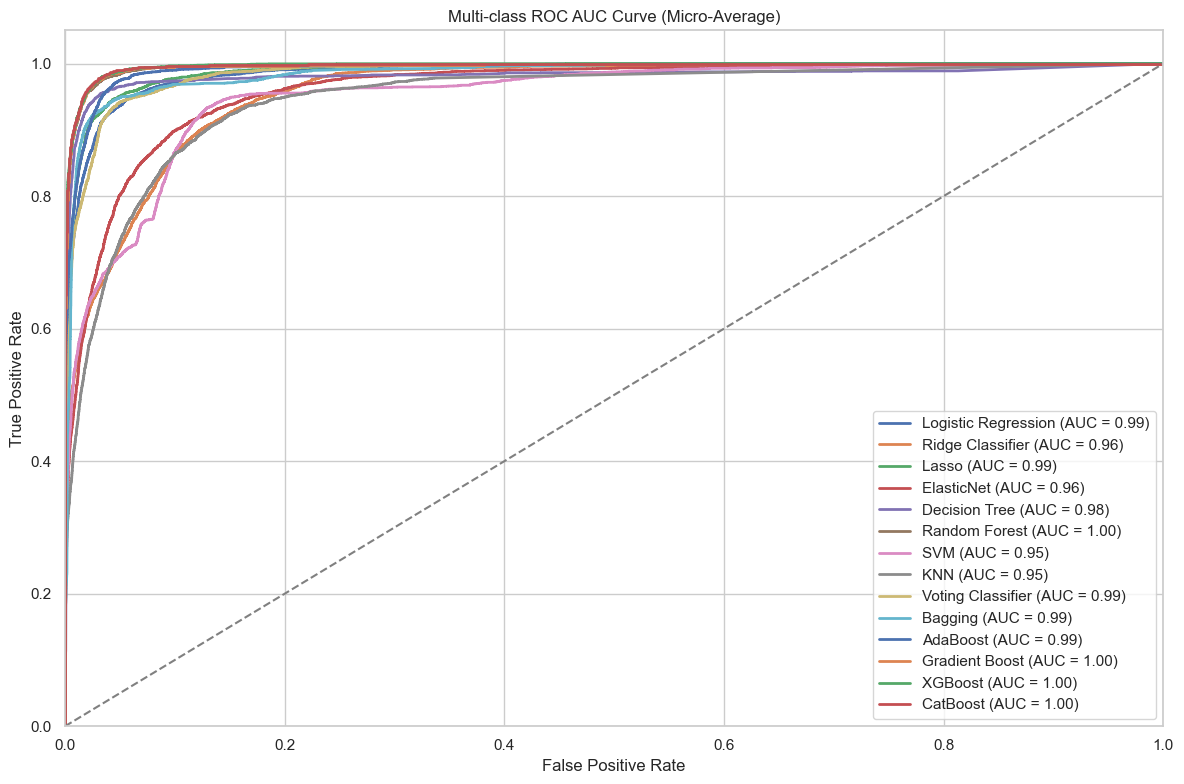

In [172]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=classes)

# Initialize ROC plot
plt.figure(figsize=(12, 8))

# Loop through all models
for name, model in model_dict.items():
    try:
        # Special handling for XGBoost (multi-class aware already)
        if name == "XGBoost":
            model.fit(x_train, y_train)
            y_score = model.predict_proba(x_test)
        else:
            ovr_model = OneVsRestClassifier(model)
            ovr_model.fit(x_train, y_train)

            if hasattr(ovr_model, "predict_proba"):
                y_score = ovr_model.predict_proba(x_test)
            elif hasattr(ovr_model, "decision_function"):
                y_score = ovr_model.decision_function(x_test)
            else:
                print(f"Skipped {name} due to lack of scoring method.")
                continue

        # Compute ROC and AUC
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot
        plt.plot(fpr["micro"], tpr["micro"],
                 label=f"{name} (AUC = {roc_auc['micro']:.2f})", lw=2)

    except Exception as e:
        print(f"Skipped {name} due to error: {e}")

# Plot reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC AUC Curve (Micro-Average)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Best Models on SMOTE/SMOTE-Tomek Data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    BaggingClassifier, VotingClassifier
)

from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


# Encode target if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Using SMOTE ===
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y_encoded)

# Train-test split on SMOTE-resampled data
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=0.3, random_state=15
)

# === Using SMOTE-Tomek ===
smt = SMOTETomek(random_state=42)
x_smt, y_smt = smt.fit_resample(x, y_encoded)

# Train-test split on SMOTE-Tomek-resampled data
x_train_smt, x_test_smt, y_train_smt, y_test_smt = train_test_split(
    x_smt, y_smt, test_size=0.3, random_state=15
)


# 4. Define all 7 models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Bagging": BaggingClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('knn', KNeighborsClassifier())
    ], voting='soft'),
    "Decision Tree": DecisionTreeClassifier()
}


Model: Random Forest (SMOTE)
Train Accuracy: 1.0000 | Test Accuracy: 0.9507
ROC-AUC = 0.9963

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1077
           1       1.00      1.00      1.00      1022
           2       0.97      0.95      0.96      1132
           3       0.91      0.92      0.91      1067
           4       0.96      0.96      0.96      1048
           5       0.97      0.98      0.97      1032
           6       0.88      0.89      0.89      1069

    accuracy                           0.95      7447
   macro avg       0.95      0.95      0.95      7447
weighted avg       0.95      0.95      0.95      7447

Confusion Matrix (Test Data):
[[1030    0   22    0    3    4   18]
 [   0 1022    0    0    0    0    0]
 [  24    0 1081    0   20    2    5]
 [   0    0    0  978    2   17   70]
 [   3    0    9    6 1007    0   23]
 [   0    0    0   12    0 1008   12]
 [   3    0    

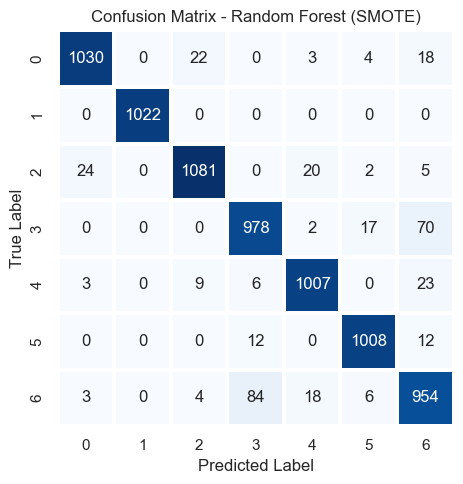


Model: Random Forest (SMOTE-Tomek)
Train Accuracy: 1.0000 | Test Accuracy: 0.9559
ROC-AUC = 0.9971

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       995
           1       1.00      1.00      1.00      1017
           2       0.97      0.97      0.97      1049
           3       0.92      0.90      0.91       896
           4       0.96      0.97      0.97      1073
           5       0.97      0.98      0.98      1031
           6       0.89      0.91      0.90       923

    accuracy                           0.96      6984
   macro avg       0.95      0.95      0.95      6984
weighted avg       0.96      0.96      0.96      6984

Confusion Matrix (Test Data):
[[ 952    0   26    0    6    1   10]
 [   0 1017    0    0    0    0    0]
 [  17    0 1013    0   14    2    3]
 [   0    0    0  805    4   18   69]
 [   4    0    8    3 1040    0   18]
 [   3    0    0   10    0 1012    6]
 [   5   

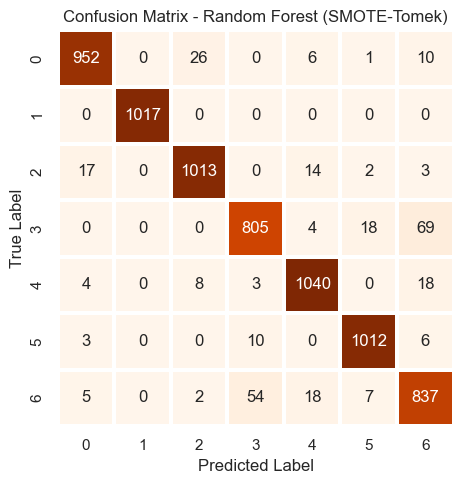


Model: Gradient Boosting (SMOTE)
Train Accuracy: 0.9724 | Test Accuracy: 0.9472
ROC-AUC = 0.9968

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1077
           1       1.00      1.00      1.00      1022
           2       0.96      0.95      0.96      1132
           3       0.90      0.92      0.91      1067
           4       0.95      0.96      0.96      1048
           5       0.97      0.96      0.97      1032
           6       0.88      0.89      0.88      1069

    accuracy                           0.95      7447
   macro avg       0.95      0.95      0.95      7447
weighted avg       0.95      0.95      0.95      7447

Confusion Matrix (Test Data):
[[1024    0   26    0    5    6   16]
 [   0 1022    0    0    0    0    0]
 [  26    0 1076    0   22    2    6]
 [   0    0    0  977    3   18   69]
 [   5    0    8    4 1010    0   21]
 [   2    0    0   17    0  995   18]
 [   2    0

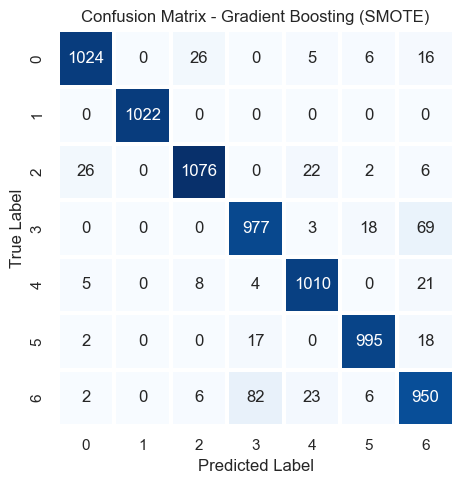


Model: Gradient Boosting (SMOTE-Tomek)
Train Accuracy: 0.9770 | Test Accuracy: 0.9535
ROC-AUC = 0.9978

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       995
           1       1.00      1.00      1.00      1017
           2       0.96      0.96      0.96      1049
           3       0.92      0.90      0.91       896
           4       0.97      0.97      0.97      1073
           5       0.97      0.97      0.97      1031
           6       0.88      0.91      0.90       923

    accuracy                           0.95      6984
   macro avg       0.95      0.95      0.95      6984
weighted avg       0.95      0.95      0.95      6984

Confusion Matrix (Test Data):
[[ 943    0   33    1    2    3   13]
 [   0 1017    0    0    0    0    0]
 [  22    0 1009    0   14    2    2]
 [   0    0    0  806    2   15   73]
 [   3    0   11    5 1038    0   16]
 [   3    0    0   12    0 1004   12]
 [   

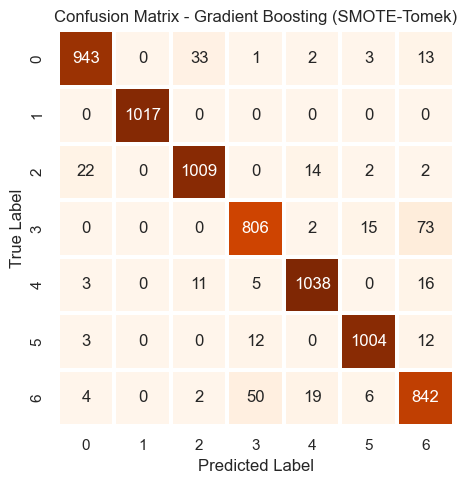


Model: XGBoost (SMOTE)
Train Accuracy: 1.0000 | Test Accuracy: 0.9539
ROC-AUC = 0.9978

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1077
           1       1.00      1.00      1.00      1022
           2       0.97      0.97      0.97      1132
           3       0.91      0.91      0.91      1067
           4       0.96      0.97      0.97      1048
           5       0.97      0.98      0.97      1032
           6       0.89      0.90      0.89      1069

    accuracy                           0.95      7447
   macro avg       0.95      0.95      0.95      7447
weighted avg       0.95      0.95      0.95      7447

Confusion Matrix (Test Data):
[[1037    0   22    1    2    4   11]
 [   0 1021    1    0    0    0    0]
 [  16    0 1093    0   18    1    4]
 [   0    0    0  973    2   14   78]
 [   2    0    9    6 1013    0   18]
 [   2    0    0   12    0 1007   11]
 [   2    0    4   76

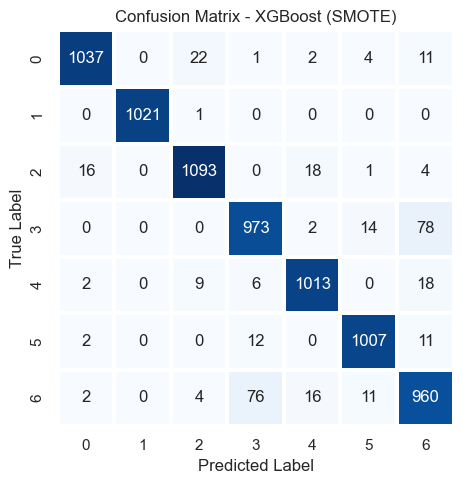


Model: XGBoost (SMOTE-Tomek)
Train Accuracy: 1.0000 | Test Accuracy: 0.9611
ROC-AUC = 0.9983

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       995
           1       1.00      1.00      1.00      1017
           2       0.97      0.97      0.97      1049
           3       0.93      0.91      0.92       896
           4       0.97      0.97      0.97      1073
           5       0.98      0.98      0.98      1031
           6       0.90      0.92      0.91       923

    accuracy                           0.96      6984
   macro avg       0.96      0.96      0.96      6984
weighted avg       0.96      0.96      0.96      6984

Confusion Matrix (Test Data):
[[ 962    0   19    1    3    3    7]
 [   0 1017    0    0    0    0    0]
 [  15    0 1022    0    8    1    3]
 [   0    0    0  811    3   13   69]
 [   5    0    7    3 1042    0   16]
 [   5    0    1    8    0 1013    4]
 [   4    0    

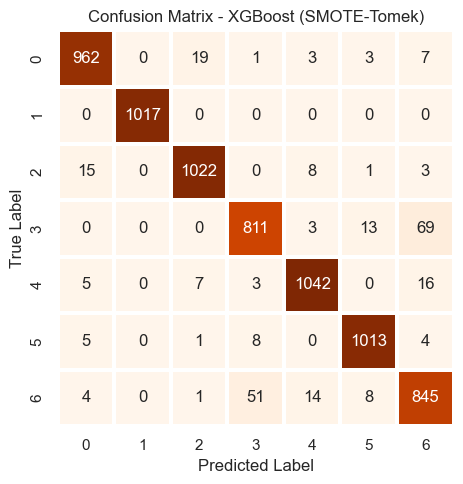


Model: CatBoost (SMOTE)
Train Accuracy: 0.9878 | Test Accuracy: 0.9517
ROC-AUC = 0.9978

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1077
           1       1.00      1.00      1.00      1022
           2       0.97      0.96      0.96      1132
           3       0.91      0.91      0.91      1067
           4       0.96      0.96      0.96      1048
           5       0.97      0.97      0.97      1032
           6       0.89      0.89      0.89      1069

    accuracy                           0.95      7447
   macro avg       0.95      0.95      0.95      7447
weighted avg       0.95      0.95      0.95      7447

Confusion Matrix (Test Data):
[[1036    0   24    1    2    3   11]
 [   0 1022    0    0    0    0    0]
 [  26    0 1083    0   17    1    5]
 [   0    0    0  976    3   18   70]
 [   5    0    8    6 1011    0   18]
 [   0    0    0   16    0 1004   12]
 [   3    0    3   7

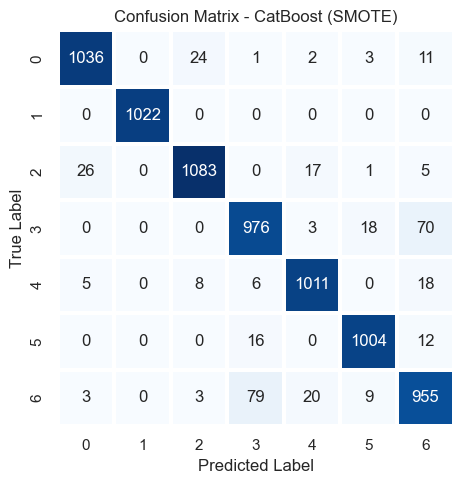


Model: CatBoost (SMOTE-Tomek)
Train Accuracy: 0.9913 | Test Accuracy: 0.9603
ROC-AUC = 0.9982

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       995
           1       1.00      1.00      1.00      1017
           2       0.97      0.97      0.97      1049
           3       0.93      0.91      0.92       896
           4       0.97      0.97      0.97      1073
           5       0.98      0.98      0.98      1031
           6       0.89      0.92      0.91       923

    accuracy                           0.96      6984
   macro avg       0.96      0.96      0.96      6984
weighted avg       0.96      0.96      0.96      6984

Confusion Matrix (Test Data):
[[ 958    0   24    0    2    4    7]
 [   0 1017    0    0    0    0    0]
 [  19    0 1017    0   10    1    2]
 [   0    0    0  813    3   12   68]
 [   4    0    7    5 1041    0   16]
 [   2    0    0    8    0 1014    7]
 [   4    0   

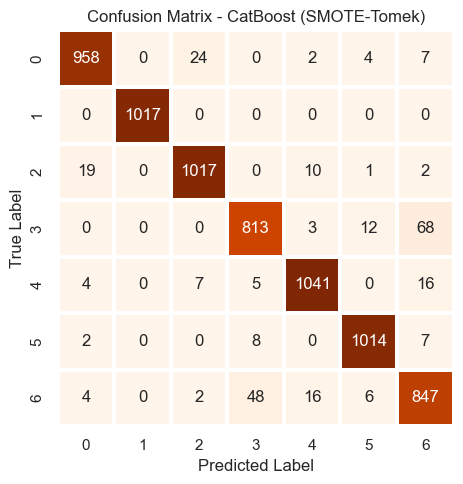


Model: Bagging (SMOTE)
Train Accuracy: 0.9966 | Test Accuracy: 0.9478
ROC-AUC = 0.9921

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1077
           1       1.00      1.00      1.00      1022
           2       0.96      0.95      0.95      1132
           3       0.90      0.92      0.91      1067
           4       0.96      0.95      0.96      1048
           5       0.97      0.97      0.97      1032
           6       0.89      0.88      0.88      1069

    accuracy                           0.95      7447
   macro avg       0.95      0.95      0.95      7447
weighted avg       0.95      0.95      0.95      7447

Confusion Matrix (Test Data):
[[1036    0   18    1    3    6   13]
 [   0 1022    0    0    0    0    0]
 [  32    0 1076    0   16    2    6]
 [   0    0    0  983    3   15   66]
 [   5    0   19    6  996    0   22]
 [   1    0    3   13    0 1003   12]
 [   2    0    6   94

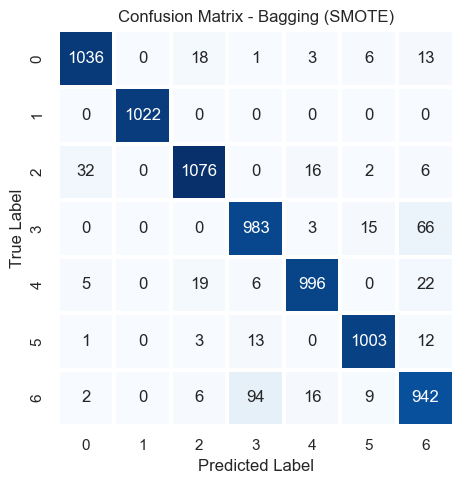


Model: Bagging (SMOTE-Tomek)
Train Accuracy: 0.9975 | Test Accuracy: 0.9542
ROC-AUC = 0.9928

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       995
           1       1.00      1.00      1.00      1017
           2       0.97      0.95      0.96      1049
           3       0.91      0.91      0.91       896
           4       0.96      0.96      0.96      1073
           5       0.98      0.98      0.98      1031
           6       0.89      0.90      0.89       923

    accuracy                           0.95      6984
   macro avg       0.95      0.95      0.95      6984
weighted avg       0.95      0.95      0.95      6984

Confusion Matrix (Test Data):
[[ 957    0   18    0    6    4   10]
 [   0 1017    0    0    0    0    0]
 [  32    0 1001    0   13    1    2]
 [   1    0    0  814    2   14   65]
 [   3    0   10    4 1035    0   21]
 [   3    0    0   11    0 1010    7]
 [   4    0    

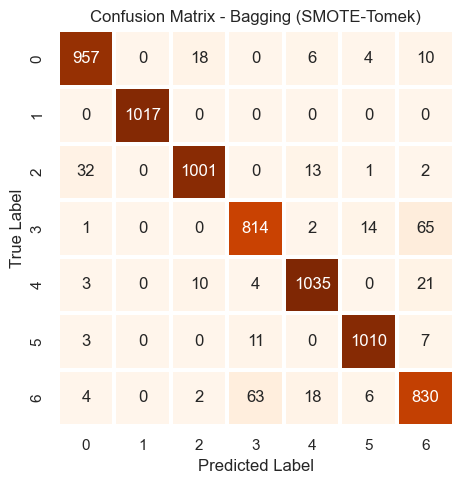


Model: Voting Classifier (SMOTE)
Train Accuracy: 0.9724 | Test Accuracy: 0.9185
ROC-AUC = 0.9927

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1077
           1       0.92      0.99      0.95      1022
           2       0.92      0.93      0.93      1132
           3       0.86      0.85      0.86      1067
           4       0.95      0.95      0.95      1048
           5       0.96      0.96      0.96      1032
           6       0.87      0.80      0.84      1069

    accuracy                           0.92      7447
   macro avg       0.92      0.92      0.92      7447
weighted avg       0.92      0.92      0.92      7447

Confusion Matrix (Test Data):
[[1027    7   13    4    4    2   20]
 [   0 1008    6    3    1    2    2]
 [  12   18 1057    2   28    2   13]
 [  25   19    8  912    4   27   72]
 [   3    6   33    3  992    0   11]
 [   6    1    0   30    0  988    7]
 [  25   38

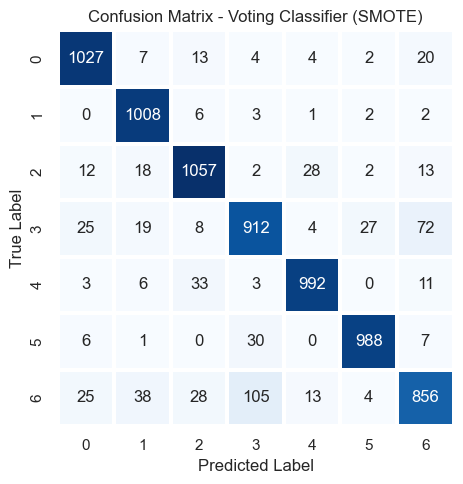


Model: Voting Classifier (SMOTE-Tomek)
Train Accuracy: 0.9739 | Test Accuracy: 0.9254
ROC-AUC = 0.9939

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       995
           1       0.93      0.98      0.96      1017
           2       0.91      0.95      0.93      1049
           3       0.88      0.84      0.86       896
           4       0.97      0.95      0.96      1073
           5       0.96      0.97      0.97      1031
           6       0.87      0.82      0.85       923

    accuracy                           0.93      6984
   macro avg       0.92      0.92      0.92      6984
weighted avg       0.92      0.93      0.92      6984

Confusion Matrix (Test Data):
[[ 935    4   19    3    7    5   22]
 [   0  994   12    1    1    4    5]
 [   8   13  997    4   16    2    9]
 [  32   15    6  753    4   25   61]
 [   2    4   31    1 1024    0   11]
 [   4    0    1   23    0  999    4]
 [  2

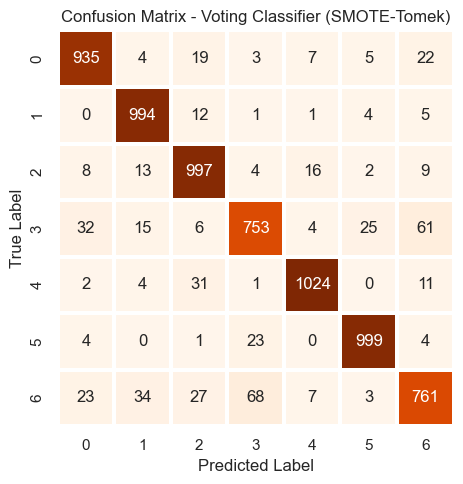


Model: Decision Tree (SMOTE)
Train Accuracy: 1.0000 | Test Accuracy: 0.9284
ROC-AUC = 0.9582

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1077
           1       1.00      1.00      1.00      1022
           2       0.94      0.94      0.94      1132
           3       0.87      0.87      0.87      1067
           4       0.94      0.94      0.94      1048
           5       0.95      0.97      0.96      1032
           6       0.84      0.85      0.85      1069

    accuracy                           0.93      7447
   macro avg       0.93      0.93      0.93      7447
weighted avg       0.93      0.93      0.93      7447

Confusion Matrix (Test Data):
[[1015    0   32    0    4    3   23]
 [   0 1022    0    0    0    0    0]
 [  40    0 1062    0   24    1    5]
 [   1    0    0  924   12   25  105]
 [  10    0   20   11  987    0   20]
 [   4    0    1   15    0  996   16]
 [   4    0    

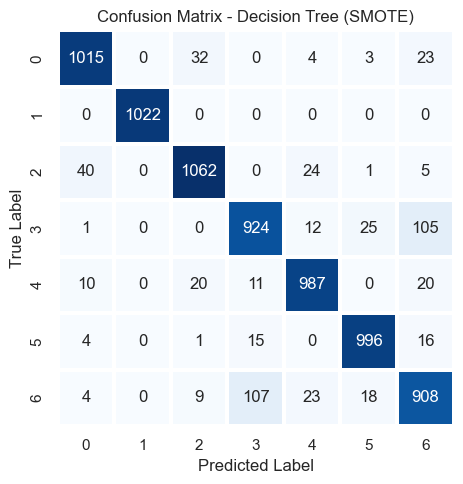


Model: Decision Tree (SMOTE-Tomek)
Train Accuracy: 1.0000 | Test Accuracy: 0.9393
ROC-AUC = 0.9648

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       995
           1       1.00      1.00      1.00      1017
           2       0.95      0.95      0.95      1049
           3       0.90      0.87      0.89       896
           4       0.96      0.96      0.96      1073
           5       0.97      0.96      0.96      1031
           6       0.84      0.88      0.86       923

    accuracy                           0.94      6984
   macro avg       0.94      0.94      0.94      6984
weighted avg       0.94      0.94      0.94      6984

Confusion Matrix (Test Data):
[[ 936    0   34    0    9    4   12]
 [   0 1017    0    0    0    0    0]
 [  33    0  999    0   13    1    3]
 [   0    0    0  783    3   13   97]
 [   5    0   11    4 1030    0   23]
 [   6    0    2   18    0  987   18]
 [  11   

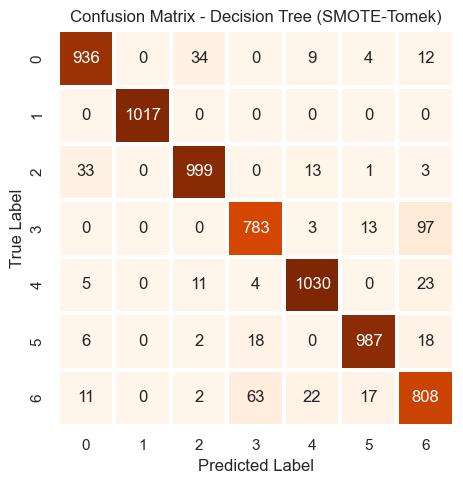

In [182]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix
)

# Function to plot clean confusion matrix
def plot_conf_matrix(cm, title, labels, cmap):
    plt.figure(figsize=(6, 5))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sns.heatmap(df_cm, annot=True, fmt='d', cmap=cmap,
                cbar=False, linewidths=1.5, linecolor='white', square=True)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Main loop
for name, model in models.items():

    # === SMOTE ===
    print(f"\nModel: {name} (SMOTE)")
    model.fit(x_train_smote, y_train_smote)
    y_pred = model.predict(x_test_smote)
    y_train_pred = model.predict(x_train_smote)

    # Accuracies
    train_acc = accuracy_score(y_train_smote, y_train_pred)
    test_acc = accuracy_score(y_test_smote, y_pred)
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

    # ROC AUC (use 'weighted' for multiclass)
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test_smote)
        else:
            y_score = model.decision_function(x_test_smote)
        roc_auc = roc_auc_score(y_test_smote, y_score, multi_class="ovr", average="weighted")
        print(f"ROC-AUC = {roc_auc:.4f}")
    except:
        print("ROC-AUC = Not Available")

    # Classification report
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test_smote, y_pred, target_names=le.classes_.astype(str)))

    # Confusion Matrix
    print("Confusion Matrix (Test Data):")
    cm = confusion_matrix(y_test_smote, y_pred)
    print(cm)
    plot_conf_matrix(cm, f"Confusion Matrix - {name} (SMOTE)", le.classes_, cmap="Blues")

    # === SMOTE-Tomek ===
    print(f"\nModel: {name} (SMOTE-Tomek)")
    model.fit(x_train_smt, y_train_smt)
    y_pred = model.predict(x_test_smt)
    y_train_pred = model.predict(x_train_smt)

    # Accuracies
    train_acc = accuracy_score(y_train_smt, y_train_pred)
    test_acc = accuracy_score(y_test_smt, y_pred)
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

    # ROC AUC
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test_smt)
        else:
            y_score = model.decision_function(x_test_smt)
        roc_auc = roc_auc_score(y_test_smt, y_score, multi_class="ovr", average="weighted")
        print(f"ROC-AUC = {roc_auc:.4f}")
    except:
        print("ROC-AUC = Not Available")

    # Classification report
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test_smt, y_pred, target_names=le.classes_.astype(str)))

    # Confusion Matrix
    print("Confusion Matrix (Test Data):")
    cm = confusion_matrix(y_test_smt, y_pred)
    print(cm)
    plot_conf_matrix(cm, f"Confusion Matrix - {name} (SMOTE-Tomek)", le.classes_, cmap="Oranges")


# We are getting the best results in CatBoost so we will check how the confusion matrix looks like

# CatBoost with SMOTE

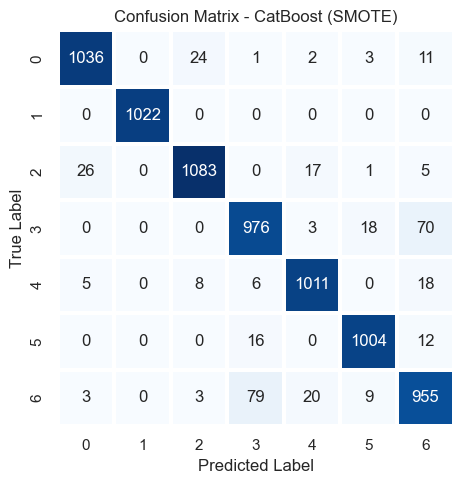

In [183]:
from sklearn.metrics import confusion_matrix

catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(x_train_smote, y_train_smote)
y_pred_smote = catboost_model.predict(x_test_smote)

cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
plot_conf_matrix(cm_smote, "Confusion Matrix - CatBoost (SMOTE)", le.classes_, cmap="Blues")


# CatBoost with SMOTE Tomek

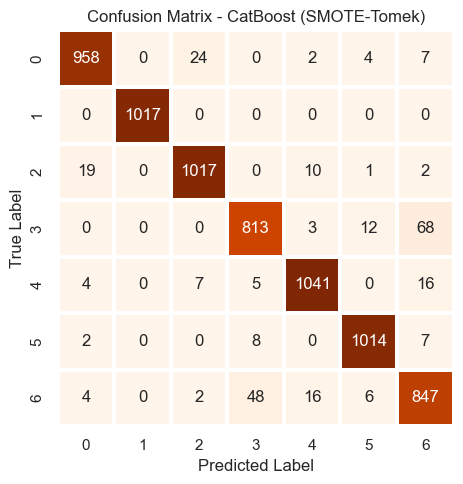

In [184]:
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(x_train_smt, y_train_smt)
y_pred_smt = catboost_model.predict(x_test_smt)

cm_smt = confusion_matrix(y_test_smt, y_pred_smt)
plot_conf_matrix(cm_smt, "Confusion Matrix - CatBoost (SMOTE-Tomek)", le.classes_, cmap="Oranges")


## So, CatBoost with SMOTE Tomek is giving the best accuracy and the confusion matrix looks good 
## Therefore we will go with Cat Boost (SMOTE TOMEK)

# (Train + Save Final Pipeline)

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from joblib import dump

# Assuming df_final is already loaded and cleaned
x = df_final.drop("Class", axis=1)
y = df_final["Class"]

# 1. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. Split data
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.3, random_state=15)

# 3. Define pipeline
pipeline = Pipeline([
    ("smote_tomek", SMOTETomek(random_state=42)),
    ("catboost", CatBoostClassifier(verbose=0))
])

# 4. Train model
pipeline.fit(x_train, y_train)

# 5. Save pipeline and label encoder
dump(pipeline, "catboost_pipeline.joblib")
dump(le, "label_encoder.joblib")


['label_encoder.joblib']

In [191]:
import streamlit as st
import pandas as pd
import numpy as np
from joblib import load

# === Load the trained pipeline and label encoder ===
model = load("catboost_pipeline.joblib")
le = load("label_encoder.joblib")

# === Page Config ===
st.set_page_config(page_title="Multi-Class Predictor", page_icon="🔍")
st.title("🔍 Multi-Class Class Prediction App")
st.markdown("Using **CatBoost + SMOTE-Tomek** pipeline to predict the `Class` based on 17 input features.")

# === Define the required input features ===
features = [
    "Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRatio",
    "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity",
    "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2",
    "ShapeFactor3", "ShapeFactor4"
]

# === Optional: Set default values (you can tweak based on your dataset stats) ===
default_values = {
    "Area": 10000.0, "Perimeter": 2.2, "MajorAxisLength": 0.87, "MinorAxisLength": 1.0,
    "AspectRatio": 1.02, "Eccentricity": 1.4, "ConvexArea": 4.5, "EquivDiameter": 2.2,
    "Extent": 0.91, "Solidity": -0.5, "roundness": 1.0, "Compactness": 0.9,
    "ShapeFactor1": 0.83, "ShapeFactor2": 0.008, "ShapeFactor3": 0.0024,
    "ShapeFactor4": 0.69
}

# === Input Form ===
st.subheader("🧾 Enter Feature Values")
input_data = {}

for feature in features:
    input_data[feature] = st.number_input(
        f"{feature}", 
        value=default_values.get(feature, 0.0), 
        format="%.6f"
    )

# === Predict Button ===
if st.button("Predict Class"):
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    class_label = le.inverse_transform([prediction])[0]

    st.success(f"✅ Predicted Class: **{class_label}**")

    # Show probabilities if available
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(input_df)[0]
        top3_idx = np.argsort(probas)[::-1][:3]
        
        st.markdown("📊 **Prediction Probabilities:**")
        for idx in top3_idx:
            prob_label = le.inverse_transform([idx])[0]
            st.write(f"- Class **{prob_label}**: {probas[idx]:.4f}")


In [193]:
with open("app.py", "w", encoding="utf-8") as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
from joblib import load

# === Load the trained pipeline and label encoder ===
model = load("catboost_pipeline.joblib")
le = load("label_encoder.joblib")

# === Page Config ===
st.set_page_config(page_title="Multi-Class Predictor", page_icon="🔍")
st.title("🔍 Multi-Class Class Prediction App")
st.markdown("Using **CatBoost + SMOTE-Tomek** pipeline to predict the `Class` based on 17 input features.")

# === Define the required input features ===
features = [
    "Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRatio",
    "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity",
    "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2",
    "ShapeFactor3", "ShapeFactor4"
]

# === Optional: Set default values (you can tweak based on your dataset stats) ===
default_values = {
    "Area": 10000.0, "Perimeter": 2.2, "MajorAxisLength": 0.87, "MinorAxisLength": 1.0,
    "AspectRatio": 1.02, "Eccentricity": 1.4, "ConvexArea": 4.5, "EquivDiameter": 2.2,
    "Extent": 0.91, "Solidity": -0.5, "roundness": 1.0, "Compactness": 0.9,
    "ShapeFactor1": 0.83, "ShapeFactor2": 0.008, "ShapeFactor3": 0.0024,
    "ShapeFactor4": 0.69
}

# === Input Form ===
st.subheader("🧾 Enter Feature Values")
input_data = {}

for feature in features:
    input_data[feature] = st.number_input(
        f"{feature}", 
        value=default_values.get(feature, 0.0), 
        format="%.6f"
    )

# === Predict Button ===
if st.button("Predict Class"):
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    class_label = le.inverse_transform([prediction])[0]

    st.success(f"✅ Predicted Class: **{class_label}**")

    # Show probabilities if available
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(input_df)[0]
        top3_idx = np.argsort(probas)[::-1][:3]
        
        st.markdown("📊 **Prediction Probabilities:**")
        for idx in top3_idx:
            prob_label = le.inverse_transform([idx])[0]
            st.write(f"- Class **{prob_label}**: {probas[idx]:.4f}")


""")


In [ ]:
Step 1 -> Type D:
Step 2 Then type -> cd "D:\Data_science\Supervised Machine Learning\Mini Project 2"
Step 3 -> 
Step 4 -> streamlit run app.py